<a href="https://colab.research.google.com/github/linuteresa/Predictive-Analytics-Formula-One/blob/main/602_p5_linuteresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

## 1.1. Problem / Research Question
*"How can we quantify overtaking difficulty across Formula 1 circuits and does it difficulty vary significantly with regulatory changes (such as introduction to DRS, car weight adjustments and aerodynamic modifications)"*


## 1.2. Why did I choose this dataset?
I have a strong personal interest in Formula one. It is the sport I follow most closely and my passion for cars and driving naturally drew me to the speed and adrenaline it offers. Formula one represents the pinnacle of engineering and performance, where the goal is to build cars that are both incredibly fast and are safe within the constraints of strict regulations. Each year, teams push the limit of technology, which I truly find fascinating.

What excites me the most is the opportunity to analyse one of the sport's most debated aspects, overtaking. Fans and experts often argue about whether certain circuits are inherently more difficult for overtakes (eg: Monaco) and whether regulatory changes such as introduction of DRS, car weight adjustments, or aerodynamic modifications have truly made the racing more competitive. I believe by analyzing this dynamic, I can examine how policy changes affect measurable performance, an insight that translates well into fields like technology product updates , public policy evaluation and A/ B testing.





## 1.3. The population
The population I wish to study is Formula 1 races between 1950 and 2023.


*   This period covers multiple major regulation changes, including the introduction of DRS (2011), hybrid engines (2014) and weight rule changes.
*   Each race in this population contains data on overtakes, race results, circuit details and contextual factors.




## 1.4. Variables



Independent variables (factors that influence the outcome)

        1. Regulatory indicators (DRS, Hybrid engine era, minimum car weight rules and aerodynamic changes)
        2. Circuit characteristics (track length, number of corners, street vs permanent track, DRS zones)
        3. Weather conditions (dry, wet, mixed races)
          

 Dependant Variables (outcome of interest)

         1. Overtaking difficulty index (CODI)   = overtakes / (number of laps * number of cars)
         High CODI - circuit allows frequent overtakes per lap per car, so easier to pass
         Low CODI - circuit restricts overtaking, harder to pass cars.

  Confounder variable (Factors that can't be controlled but can influence relationship between independent and dependent variables, potentially biasing results)

          1. Grid size (number of cars in each race)
          The grid sizes have been different over the years, as more cars = more potential overtakes, this can lead to inconsistency and bias.  So while calculating CODI, we divide overtakes by number of cars.
          2. Race length (number of laps)
          Longer races naturally have more overtakes. So while calculating ODI, divide overtakes by number of laps.
          3. Regulation era (DRS)
          Introduction of DRS controls independent overtaking of the circuit. We can control this by using the column DRS = TRUE / FALSE. This way we can compare CODI values in both scenarios.


## 1.5. Hypothesis
If the circuit overtaking difficulty (CODI) accurately reflects overtaking difficulty, then the circuits with tight layouts, short straights and fewer overtaking zones will have lower CODI values and are harder to overtake while the circuits with higher CODI are easier to overtake. Furthermore the introduction to regulatory rules will increase CODI in certain circuits, indicating overtaking is easier under these new regulations.





## 1.6. Plan for data collection
 Dataset:

  [Formula 1 World Championship Dataset (1950-2024)](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data?select=seasons.csv)

[ F1 Regulations, Safety and Racing Performance](https://www.kaggle.com/datasets/abdelghanibelgaid/f1-regulations-safety-and-racing-performance/data)


**What is in it?**
The dataset contains detailed race lap times and driver performance information across more than two decades, during which motor sports underwent major regulatory and technological challenges.

**When?** - 1950 to 2023

**Collection method:**

  1. Download the datasets from kaggle and import using pandas.
  2. Join races.csv and results.csv through key raceId to combine race results.
  3. Join race the result in step 2 with circuit details to get the results of each circuits through circuitId key.
  4. Join the result with race_regulations (data.csv) to get details of all regulations in place with the race results. (here we used left join to keep all the race and circuit data and add regulation information only if it exists for that corresponding year)

In [ ]:
from os import renames
import pandas as pd

races = pd.read_csv('https://raw.githubusercontent.com/linuteresa/csv_data/refs/heads/main/races.csv')
results = pd.read_csv('https://raw.githubusercontent.com/linuteresa/csv_data/refs/heads/main/results.csv')
circuits = pd.read_csv('https://raw.githubusercontent.com/linuteresa/csv_data/refs/heads/main/circuits.csv')
regulations = pd.read_csv('https://raw.githubusercontent.com/linuteresa/csv_data/refs/heads/main/data.csv')

race_results = pd.merge(races, results, on = 'raceId')
race_details = pd.merge(race_results,circuits, on = 'circuitId')
rename_regulations = regulations.rename(columns={'Season':'year'})
full_data = pd.merge(race_details, rename_regulations, on = 'year', how ="left")
print(full_data.head())

   raceId  year  round  circuitId                 name_x        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   

     time_x                                              url_x fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
2  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
3  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
4  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   

  fp1_time  ... length_km Number of Teams Number of Drivers Number of Races  \
0       \N  ...     5.278            

# Project 2


## 2.1. Preliminary information about the data

In [ ]:
GREEN = '\033[92m'
END = '\033[0m'
print(f"{GREEN}SHAPE OF DATA :-\n{END}", full_data.shape)
print(f"{GREEN}\nDATATYPES :-\n{END}",full_data.dtypes)
print(f"{GREEN}\nCOLUMNS:- \n{END}",full_data.columns)
print(f"{GREEN}\nNO OF UNIQUE ELEMENTS :-\n{END}",full_data.nunique())
print(f"{GREEN}\nDESCRIPTIVE STATISTICS :-\n{END}",full_data.describe())

SHAPE OF DATA :-
 (26759, 54)

DATATYPES :-
 raceId                                      int64
year                                        int64
round                                       int64
circuitId                                   int64
name_x                                     object
date                                       object
time_x                                     object
url_x                                      object
fp1_date                                   object
fp1_time                                   object
fp2_date                                   object
fp2_time                                   object
fp3_date                                   object
fp3_time                                   object
quali_date                                 object
quali_time                                 object
sprint_date                                object
sprint_time                                object
resultId                                    int64
drive

##2.2. Specific data needs
 The data has already been merged.

*   Join races.csv and results.csv through key raceId to combine race results.
*  Join race the result in step 2 with circuit details to get the results of each circuits through circuitId key.
*   Join the result with race_regulations (data.csv) to get details of all regulations in place with the race results. (here we used left join to keep all the race and circuit data and add regulation information only if it exists for that corresponding year)

## 2.3. Potential issues with the data

The following checks are done in the code below:

*   checking for duplicates
*   missing and null values
*   checks for inconsitencies
*   check for misspellings
*   checking for weird outliers




In [ ]:
PINK = '\033[1;35m'
END = '\033[0m'
print(f"{PINK}Duplicated entries :\n{END}", full_data.duplicated())
print(f"{PINK}Number of duplicated entries : {END}", full_data.duplicated().sum())

Duplicated entries :
 0        False
1        False
2        False
3        False
4        False
         ...  
26754    False
26755    False
26756    False
26757    False
26758    False
Length: 26759, dtype: bool
Number of duplicated entries :  0


There are no duplicates in the dataset.


In [ ]:
print(f"{PINK}Null entries:\n{END}")
full_data.isnull().sum().sort_values(ascending=False).head(20)

Null entries:



,0
Average Car Weight (kg),12909
Fatalities,12909
New Regulations Impacting Aerodynamics,12909
Number of New Regulations,12909
Number of Races,12909
Number of Drivers,12909
Overtakes,12909
DRS,12909
Number of Teams,12909
fp1_date,0


4. This inconsistency is expected as the safety regulations like DRS came in placee after 1990, so obviously the rows corresponding to years 1950 - 1990 will have no values there.

PLAN A: So we can split the data set into 2 - Pre Regulation era (1950 - 1990) and post Regulation era (after 1990). Dropping the rows entirely wouldn't make much sense as it would mean we loose 40 years of historical data. We can add a new column 'Regulation era' in the data and with a lamba function fill 0 for years before 1990 and 1 for year 1990 and later. Then I am planning on spliting the data set into 2 and analyse the pre and post regulation era separetly inorder to avoid any bias.

Below are the columns with NaN / Null values;

1. Average Car Weight (kg)
2. Fatalities
3. New Regulations Impacting Aerodynamics
4. Number of New Regulations
5. Number of Races
6. Number of Drivers
7. Overtakes
8. DRS
9. Number of Teams

Upon further analysis of the data, I found that races before 1990 did not have values of overtakes ( which is essential to compute CODI), thus prefillling it with some median or mode would only create bias as the number of teams, car weight, races etc have changed drastically in the modern era due to advancement in technology. Thus I move on plan B, which is dropping all rows of year before 1990. So instead of having a historical analysis, we can analyse how the introduction of new regulations have impacted over takes in the modern f1 era and also try to see if certain tracks have an added advandage in performing overtakes.

In [ ]:
analysis_data = full_data[full_data['year']>=1990].reset_index(drop = True)
print(f"{PINK}Null entries:\n{END}")
analysis_data.isnull().sum().sort_values(ascending=False)

Null entries:



,0
Average Car Weight (kg),479
Fatalities,479
New Regulations Impacting Aerodynamics,479
Number of New Regulations,479
Number of Races,479
Number of Drivers,479
Overtakes,479
DRS,479
Number of Teams,479
fp1_date,0


A z-score is considered an outlier when its absolute value is greater than 3, meaning the data point is more than three standard deviations from the mean. This threshold is based on the empirical rule, which states that for a normal distribution, about 99.7% of data points fall within three standard deviations of the mean, making values outside this range unusual. This is why I chose Z score greater than 3 as our outlier threshold.

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

numeric_cols = analysis_data.select_dtypes(include=[np.number]).columns
numeric_data = analysis_data[numeric_cols]
z_scores = stats.zscore(numeric_data)
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

if (z_scores_df.values > 3).sum(axis=0).any():
  outliers = z_scores_df > 3
  print("Number of weird outlier (z-score greater than 3) \n", outliers.sum())

Number of weird outlier (z-score greater than 3) 
 raceId                                      0
year                                        0
round                                       0
circuitId                                 260
resultId                                    0
driverId                                    0
constructorId                               0
grid                                        0
positionOrder                              61
points                                    308
laps                                        0
statusId                                  608
lat                                         0
lng                                         0
alt                                       337
turns                                     192
length_km                                   0
Number of Teams                             0
Number of Drivers                           0
Number of Races                             0
Number of New Regulations    

The majority of the outliers are from the null and NaN values.

## 2.4. Reorganizations to be done in the data
5. Already changed the 'season' column to 'year' to ensure consistency and easy merging.

## 2.5. Data Cleaning plan - after identifying the issues in the data.

6. We can replace the null and NaN in :-

📍average Car Weight (kg) - Median, as car weight is a numeric value and it has been increasing consistently over the years.

📍Fatalities	- 0 (rare events), setting it to 0 means no fatalities have occured)

📍New Regulations Impacting Aerodynamics	- 0 (means not recorded or doesnt exist in that year)

📍Number of New Regulations	- 0 (same as above)

📍Number of Races	- MODE  (mostly same number of races in a season / year )

📍Number of Drivers - MODE (mostly same number of drivers in a race every year)

📍Overtakes - 	Median  (to avoid picking an unusually high or unusually low value)

📍Number of Teams - MODE  (Mostly same number of teams compete every year)

📍DRS	- FALSE  (since DRS was only introduced in 2011, all data before than can be set with false if there is missing data)

In [ ]:
median_fill_cols = ['Overtakes','Average Car Weight (kg)']
analysis_data[median_fill_cols] = analysis_data[median_fill_cols].fillna(analysis_data[median_fill_cols].median())

zero_fill_cols = ['Fatalities','New Regulations Impacting Aerodynamics','Number of New Regulations']
analysis_data[zero_fill_cols] = analysis_data[zero_fill_cols].fillna(0)

mode_fill_data = ['Number of Teams','Number of Drivers','Number of Races']
# Iterate through columns and fill NaN with the mode of each column
for col in mode_fill_data:
  analysis_data[col] = analysis_data[col].fillna(analysis_data[col].mode()[0])

false_fill_data = ['DRS']
analysis_data[false_fill_data]= analysis_data[false_fill_data].fillna(False)

cleaned_file = 'cleaned_f1_data.csv'
analysis_data.to_csv(cleaned_file, index = False)

/tmp/ipython-input-3011049875.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  analysis_data[false_fill_data]= analysis_data[false_fill_data].fillna(False)


In [ ]:
analysis_data.isna().sum().sort_values(ascending=False)

,0
raceId,0
year,0
round,0
circuitId,0
name_x,0
date,0
time_x,0
url_x,0
fp1_date,0
fp1_time,0


In [ ]:
cleaned_data = pd.read_csv(cleaned_file)
print("\n 📈 First 5 rows of cleaned data:-\n")
print(cleaned_data.head())
print("\n 📈 Last 5 rows of cleaned data:-\n")
print(cleaned_data.tail())


 📈 First 5 rows of cleaned data:-

   raceId  year  round  circuitId                 name_x        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   

     time_x                                              url_x fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
2  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
3  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
4  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   

  fp1_time  ... length_km Number of Teams Number of Drivers Number of Races  \
0

# Project 3
Yes I think I have the right data. It includes race results, circuits and regulation info which directly relate to Overtaking difficulty (CODI). However pre-1990 data lacked these overtaking metrics and regulation info, thus it was dropped.

Initial Questions:-

❓Did the data have the required range, diversity and variability inorder to analyse my hypothesis.

❓Are the datatypes appropiate and their format consistent.

❓Is this data sufficient to reach a reliable conclusion.

❓Is the data complete, does it have data for all the required columns. How will I measure my success

❓Are circuits with longer straights ( lesser turns) easier to overtake.

❓Do new regulations correlate with changes in overtaking patterns.

❓Has introduction of DRS increased overtaking capability.

❓Is it really hard to win in Monaco GP (a street circuit with tighter turns)



## 3.1. Charactersitics of data

Here was see the shape of the data, what each row and column represent, the number of columns etc.

In [ ]:
cleaned_data.shape

(14329, 54)

The dataset has 14329 race level records and 54 features columns in total, thus removing unwanted features which do not impact our calculation in overtaking diffculty index.

In [ ]:
cleaned_data = cleaned_data.drop(columns=['round','time_x','url_x','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_time','quali_date','sprint_date','sprint_time','alt','constructorId','number','grid','position','positionOrder','points','time_y','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','circuitRef','location','country','lat','name_y','lng','url_y','Fatalities','Average Car Weight (kg)'])

In [ ]:
cleaned_data = cleaned_data.drop(columns=['date','positionText','driverId','resultId','Number of Teams','Number of Races'])

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   raceId                                  14329 non-null  int64  
 1   year                                    14329 non-null  int64  
 2   circuitId                               14329 non-null  int64  
 3   name_x                                  14329 non-null  object 
 4   laps                                    14329 non-null  int64  
 5   turns                                   14329 non-null  int64  
 6   length_km                               14329 non-null  float64
 7   Number of Drivers                       14329 non-null  float64
 8   Number of New Regulations               14329 non-null  float64
 9   New Regulations Impacting Aerodynamics  14329 non-null  float64
 10  DRS                                     14329 non-null  bo

## 3.2. Exploring every variable in the dataset

Each row represents one race event at a specific circuit in a specific year, including its performance metrics, car attributes, circuit characteristics and regulation features.

Rows:

🔺raceId - unique identifier of each race

🔺year - of the race being held

🔺circuitId - unique id of the individual circuits(race tracks) where races are held

🔺name - of the grand Prix (the race)

🔺laps - total number of laps in the circuit ( can be used to calculate the total race length )

🔺turns - Number of turns in the circuit (more turns = harder to overtake)

🔺length_km - length of the track in kilometers

🔺Number of Drivers - total number of drivers competing in a year, can be  used to calculate the number of overtakes

🔺Number of New Regulations - in a particular year, used to measure impact of regulations

🔺New Regulations Impacting Aerodynamics -  in that particular year also used to measure regulatory impact

🔺DRS - whether DRS was implemented (aids in overtaking) 0 means no, 1 means yes.

🔺Overtakes - number of overtakes in a year


In [ ]:
duplicates = cleaned_data[cleaned_data.duplicated()]
duplicates.head(5)
cleaned_data = duplicates.drop_duplicates().reset_index(drop=True)

In [ ]:
print(f"{PINK}Number of duplicated entries : {END}", cleaned_data.duplicated().sum())

Number of duplicated entries :  0


We are dropping column overtakes as this column in capturing the total number of overtakes in a year, which is not what we desire. We would like to get the total number of overtakes per race/ per circuit inorder to analyse how certain circuits may/ may not provide overtaking advandage.

In [ ]:
cleaned_data = cleaned_data.drop(columns=['Overtakes'])

Now we merge the new data set that captures overtakes per race. We are merging with the key 'name' with corresponding 'year' key.

In [ ]:
cleaned_data = cleaned_data.rename(columns={'name_x':'name'})

It was difficult to find a proper dataset with overtaking data, so upon further research I fumbled upon this person who has done this as part of a project during lockdown, where he manually captured the number of overtakes per race. I refered this sheet and also cross verified it with formula other sources and created an excel sheet capturing all this data.

sources :- 📊 https://racingpass.net/circuits/
https://www.reddit.com/r/formula1/comments/nf4jkq/f1_overtaking_database_19942020/

In [ ]:
overtake_data = pd.read_csv('https://raw.githubusercontent.com/linuteresa/csv_data/refs/heads/main/overtake_stat.csv')
overtake_data = overtake_data.rename(columns={'Year': 'year'})
dt = pd.merge(cleaned_data, overtake_data, on=['name', 'year'], how='left')
updated_file = 'overtake_f1_data.csv'
dt.to_csv(updated_file, index = False)

In [ ]:
print(f"{PINK}Number of null entries : {END}", dt.isnull().sum())
print(f"{PINK}Number of duplicated entries : {END}",dt.duplicated().sum())

Number of null entries :  raceId                                    0
year                                      0
circuitId                                 0
name                                      0
laps                                      0
turns                                     0
length_km                                 0
Number of Drivers                         0
Number of New Regulations                 0
New Regulations Impacting Aerodynamics    0
DRS                                       0
no_of_overtakes                           0
dtype: int64
Number of duplicated entries :  0


In [ ]:
dt.dropna(inplace=True)
print(f"{PINK}Number of null entries : {END}", dt.isnull().sum())
print(f"{PINK}Number of duplicated entries : {END}",dt.duplicated().sum())

Number of null entries :  raceId                                    0
year                                      0
circuitId                                 0
name                                      0
laps                                      0
turns                                     0
length_km                                 0
Number of Drivers                         0
Number of New Regulations                 0
New Regulations Impacting Aerodynamics    0
DRS                                       0
no_of_overtakes                           0
dtype: int64
Number of duplicated entries :  0


##3.3. Transformations and manipulatons done in the data
For ease of analysis and to  map relations with variables easily, I will be doing the following steps:

📍 Map DRS values to numerical values ie; True -> 1 and False -> 0

📍 Compute overtakes_per_lap = no_of_overtakes / laps, to avoid any bias created by longer circuits with higher length_km.

📍 Compute Track Density = turns / length_km, this captures how twisty/ technical the track is. Higher turns in lower lengths mean the track is much harder to overtake.

In the data there are some rows with laps = 0, so inorder to avoid division by 0, I will fill them with median value.

Yes, this is different than what I thought, before exploring deeper into the data. That is why I had to merge with new data, identify new features to compute CODI easily and further clean the data in the process.


There are no additional scaling required in the data.



In [ ]:
dt['DRS'] = np.where(dt['DRS']==True,1,np.where(dt['DRS']==False,0,dt['DRS']))
dt['laps'] = dt['laps'].fillna(dt['laps'].median())
dt['track_density'] = dt['turns']/dt['length_km']

##3.4. Exploring the variables and relationships between them.
Now we can explore each of our variables

==== DATAFRAME SHAPE ====  
(2010, 13)

==== DATAFRAME DATAYPES ====
raceId                                      int64
year                                        int64
circuitId                                   int64
name                                       object
laps                                        int64
turns                                       int64
length_km                                 float64
Number of Drivers                         float64
Number of New Regulations                 float64
New Regulations Impacting Aerodynamics    float64
DRS                                         int64
no_of_overtakes                             int64
track_density                             float64
dtype: object

==== DESCRIPTIVE STATS ==== 

            raceId         year   circuitId         laps        turns  \
count  2010.000000  2010.000000  2010.00000  2010.000000  2010.000000   
mean    472.392537  2005.250746    18.18607    51.126368    15.829353   
std     385.21762

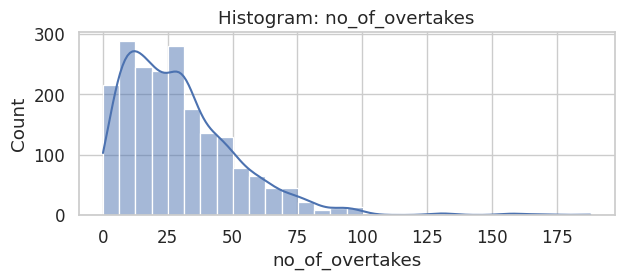

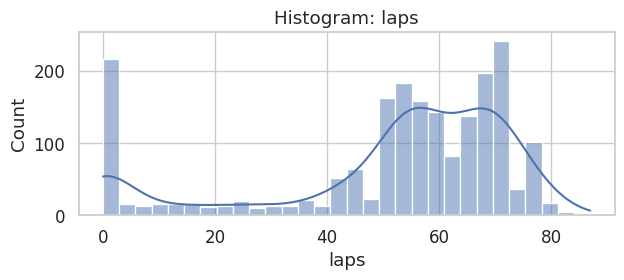

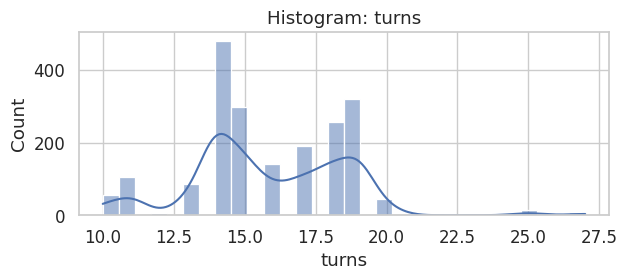

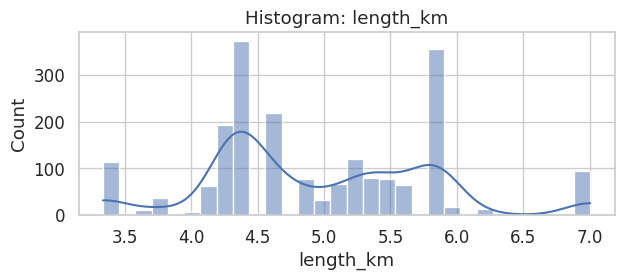

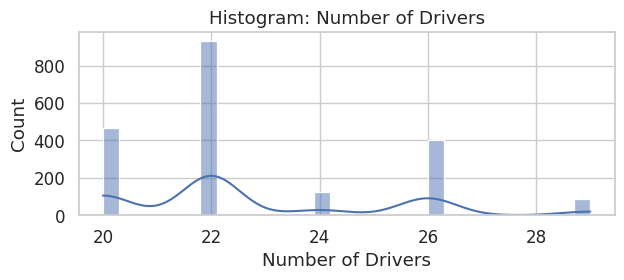

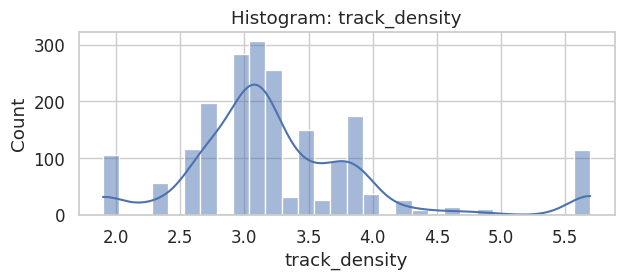

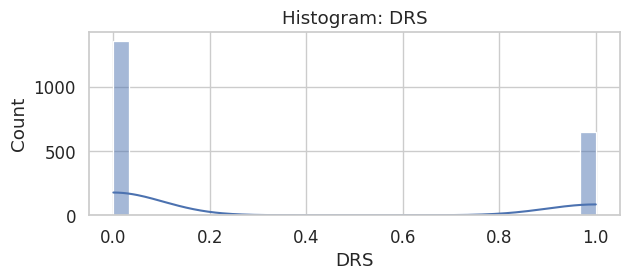

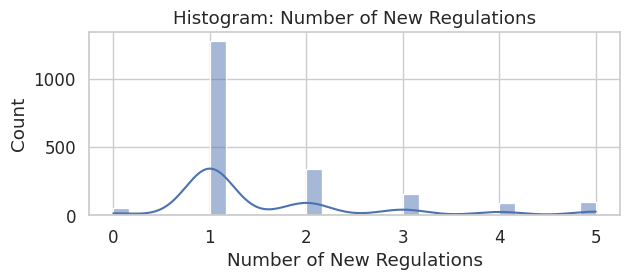

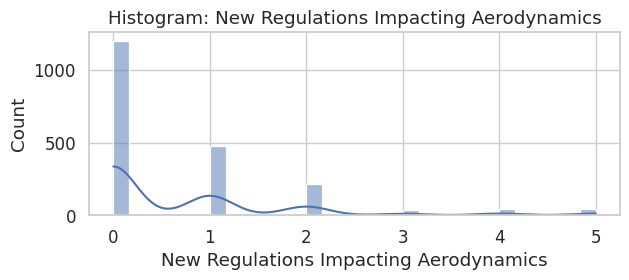

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = dt.copy()
print(f"{PINK}==== DATAFRAME SHAPE ====  {END}")
print(df.shape)
print(f"{PINK}\n==== DATAFRAME DATAYPES ===={END}")
print(df.dtypes)
print(f"\n{PINK}==== DESCRIPTIVE STATS ==== {END}\n")
print(df.describe())
numeric_cols = [
    'no_of_overtakes',
    'laps',
    'turns',
    'length_km',
    'Number of Drivers',
    'track_density',
    'DRS',
    'Number of New Regulations',
    'New Regulations Impacting Aerodynamics'
]
for col in numeric_cols:
  plt.figure(figsize=(12,3))
  plt.subplot(1,2,1)
  sns.histplot(df[col].dropna(),bins = 30,kde = True)
  plt.title(f'Histogram: {col}')
  plt.tight_layout()


###3.4.1. **Explanation of Histogram for Frequence of data**

📍no_of_overtakes - This is in the range 0 to 188. This shift is due to the technological advancements in racing cars over the years. which increased overtaking capability and top speeds. But there are 99 unique values in the table but values higher than 107 is not so common. For example, The record for the most overtakes in a single race is 186, set during the wet conditions at the 2023 Dutch Grand Prix. This figure was exceptionally high due to the constantly changing weather, which caused drivers to be on the wrong tires at various points in the race. But this is not we require as we are trying to find out the stastics in ideal conditions, so those can be considered outliers and can be removed.

📍 New Regulations Impacting Aerodynamics - are not implemented every year thus the 0 value dominates the plot ( more than 50 percentile of the plot). So values like 4 and 5 would become outliers as the mean is shifted more towards the zero.

📍Number of new regulations - varies from 0 to 5. mostly around 5 indicating atmost 5 new regulations are made in a year.

📍Number of teams racing in f1 has always been between 20 and 30 with a total of 2 drivers per team and an optional reserve driver per team.

📍The number of laps in an F1 race varies by circuit, with the race distance set at a standard of approximately 305 kilometers (about 190 miles), with the exception of the Monaco Grand Prix. For example, the Belgian Grand Prix has the fewest laps at 44, while the Monaco Grand Prix has the most at 78.

📍 Number of turns also vary with the circuits and in turn lengt_in_km. So columns with value = 0 for laps, incorrect data, or value might not be recorded.
  
      Red-Flagged Races: Many races have been shortened due to weather or accidents, often resulting in fewer than 43 laps.
      The 2021 Belgian Grand Prix is the shortest in history, with only 2 laps completed before being called off due to heavy rain.
      The 1991 Australian Grand Prix lasted only 14 laps.
      The 1975 Spanish Grand Prix lasted 29 laps (the race was scheduled for 75 laps but stopped early).
      The 1975 Austrian Grand Prix lasted 29 laps.
      The 1984 Monaco Grand Prix lasted 31 laps.
      The 2009 Malaysian Grand Prix lasted 33 laps.
      
      Since CODI is very sensitive to number of laps and our goal is to find the overtaking difficulty for circuits in regular race conditions, it is best to filter out these red flagged races so as to avoid any overtaking related bias.

In [ ]:
df_filtered = df[(df['laps'] >= 43) & (df['no_of_overtakes'] <= 107)].copy()

In [ ]:
numeric_data = df_filtered[numeric_cols]
z_scores = stats.zscore(numeric_data)
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)
if (z_scores_df.values > 3).sum(axis=0).any():
  outliers = z_scores_df > 3
  print("Number of weird outlier (z-score greater than 3) \n", outliers.sum())

Number of weird outlier (z-score greater than 3) 
 no_of_overtakes                           16
laps                                       0
turns                                     18
length_km                                  0
Number of Drivers                          0
track_density                             91
DRS                                        0
Number of New Regulations                  0
New Regulations Impacting Aerodynamics    34
dtype: int64


Outliers in the data is as expected.There are certain historic races with 0 overtakes. Circuits like Monaco are likely to have 0 overtakes as it is considered to be "tough". Which in turn also affects overtakes_per_lap.



In [ ]:
df_filtered.isna().sum()

,0
raceId,0
year,0
circuitId,0
name,0
laps,0
turns,0
length_km,0
Number of Drivers,0
Number of New Regulations,0
New Regulations Impacting Aerodynamics,0


In [ ]:
df_filtered.describe()

,raceId,year,circuitId,laps,turns,length_km,Number of Drivers,Number of New Regulations,New Regulations Impacting Aerodynamics,DRS,no_of_overtakes,track_density
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,499.468869,2006.448539,18.586404,61.707751,15.756671,4.927356,22.523507,1.675985,0.737611,0.360229,29.620712,3.278081
std,399.217827,10.215458,18.565835,9.308705,2.717910,0.811216,2.321112,1.185511,1.121549,0.480219,20.858293,0.792408
min,1.000000,1990.000000,1.000000,43.000000,10.000000,3.337000,20.000000,0.000000,0.000000,0.000000,0.000000,1.898843
25%,161.000000,1997.000000,7.000000,54.000000,14.000000,4.361000,20.000000,1.000000,0.000000,0.000000,13.000000,2.913753
50%,296.000000,2006.000000,13.000000,61.000000,15.000000,4.655000,22.000000,1.000000,0.000000,0.000000,27.000000,3.101145
75%,941.750000,2015.000000,22.000000,70.000000,18.000000,5.543000,24.000000,2.000000,1.000000,1.000000,42.000000,3.511678
max,1144.000000,2024.000000,80.000000,87.000000,27.000000,7.004000,29.000000,5.000000,5.000000,1.000000,99.000000,5.693737


<Axes: title={'center': 'Correlation Heatmap of Numeric Variables'}>

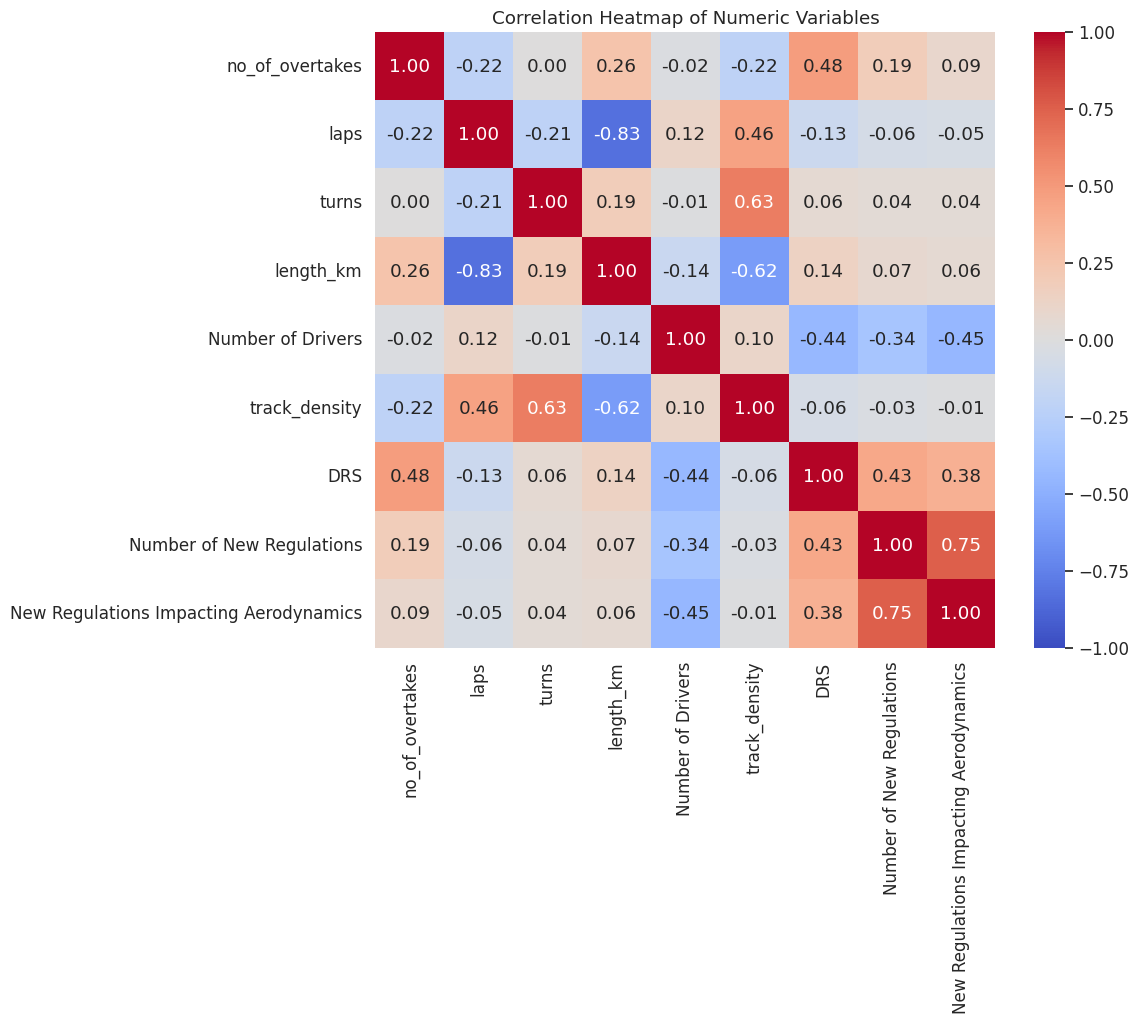

In [ ]:
corr = df_filtered[numeric_cols].corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap of Numeric Variables')
corr = df_filtered[numeric_cols].corr()
sns.heatmap(corr,annot = True,fmt ='.2f',cmap='coolwarm',vmax= 1,vmin=-1)

###3.4.2. **Observtions from heatmap for correlation of variables**

red = positive correlation - as one increases the other variable tends to increase as well

blue = negative correlatoion = as one increases, the other variable tends to decrease.

white/neutral color - no linear relationship between the variables.

Comparing no_of_overtakes with all other variables/ features:-


1. no_of_overtakes vs laps
Slight positive correlation. More laps can provide more overtaking opportunities, but track layout still strongly influences overtaking.

2. no_of_overtakes vs turns
Negative correlation. Tracks with more turns are harder to overtake on, so fewer overtakes occur.

3. no_of_overtakes vs length_km
Positive correlation. Longer tracks tend to allow more overtaking opportunities.

4. no_of_overtakes vs Number of Drivers
Slight negative correlation. More drivers can increase traffic and reduce overtaking opportunities.

5. no_of_overtakes vs track_density
Strong negative correlation. Tracks with higher density (more turns per km) reduce overtaking chances

Dependent variable:

no_of_overtakes (used as the proxy for overtaking difficulty

Independent variables - those which can influence our outcome:

laps, turns, track_density, length_km, Number of Drivers, DRS, Number of New Regulations, New Regulations Impacting Aerodynamics




<Axes: xlabel='year', ylabel='name'>

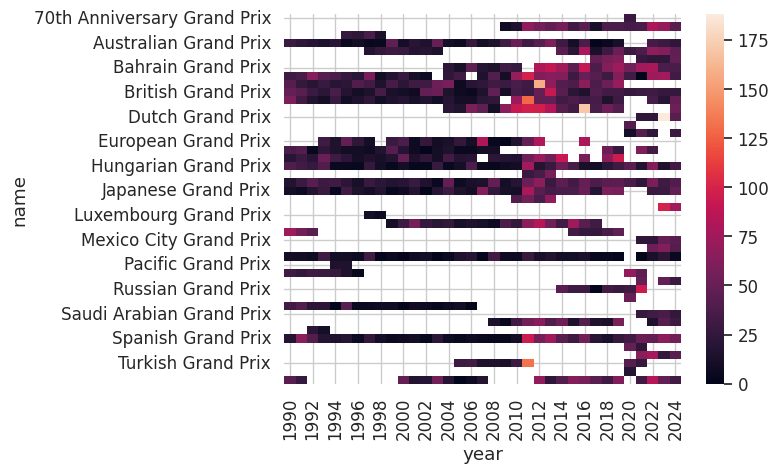

In [ ]:
sns.lineplot(x='year', y='no_of_overtakes', data=df)
sns.heatmap(df.pivot_table(index='name', columns='year', values='no_of_overtakes'))

###3.4.3. **Inference from heatmaps for seasonality**

The heatmap accounts for seasonality in the data, ie addressing the number of overtakes per year (x axis) for each Grand Prix held. Each row corresponds to a Grand Prix event and then shows details about races held there in the years 1990 to 2024.

Patterns Observed:

 📍Some races have data only in specific years, likely indicating that the venue did not host a Grandprix that year.

📍The number of overtakes vary significanly by circuit and years.

📍Certain races show period with higher overtaking activity eg: Brazilian GrandPrix, Bahrain Grand Prix etc.

📍 Gaps indicate races with zero overtakes.

📍This can be used to infer how track design of each circuit influence overtaking capability.

📍 Also notice how the same track can have varied no_of_overtakes over the years, must be due to introduction of new regulations that directly influence overtaking difficulty.


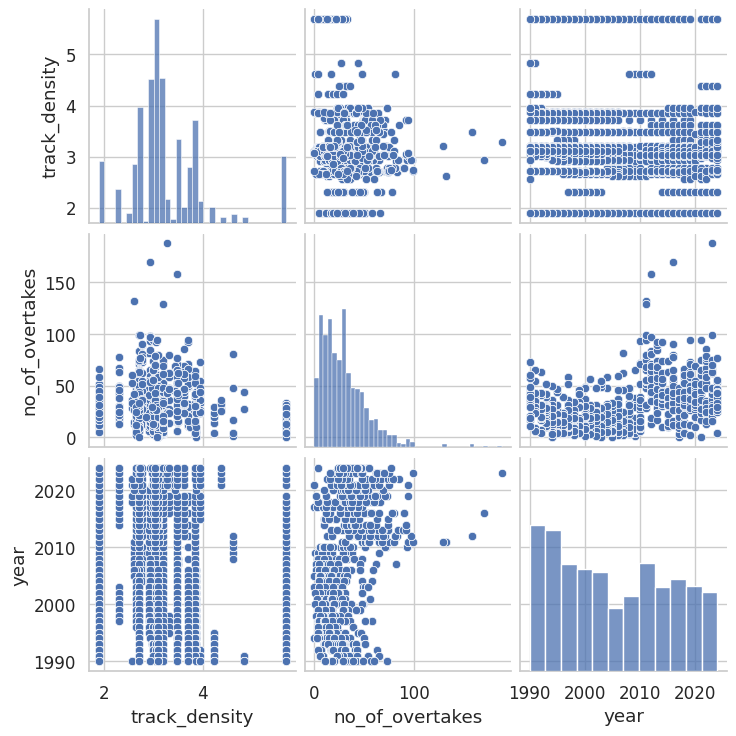

In [ ]:
sns.pairplot(dt[['track_density','no_of_overtakes','year']])

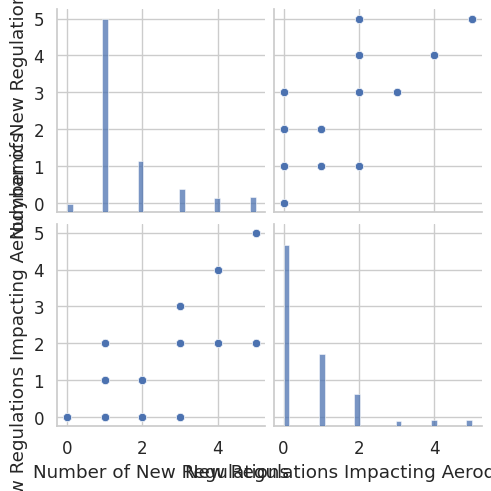

In [ ]:
import seaborn as sns
sns.pairplot(dt[['Number of New Regulations','New Regulations Impacting Aerodynamics']])

###3.4.4. **Observations from pairwise scatter plots**

Diagonal elements are historgram for each variable.

Off-diagonal scatterplots illutstrate bivariate correlation between pair of variables.

Key relationships:

1. track_density vs inv_overtakes_per_lap
Fairly strong positive relationship. Denser tracks (more turns per km) tend to have fewer overtakes per lap. This suggests that tighter, more complex layouts make overtaking more difficult.

2. Regulatory variables (Number of New Regulations and New Regulations Impacting Aerodynamics)
Positively correlated with each other but show little direct impact on track_density or inv_overtakes_per_lap. The scatterplots suggest a weak or no clear relationship, indicating that regulatory changes may affect overtaking indirectly or in combination with other factors.

3. track_density vs Regulatory variables
Weak relationship. Track geometry does not appear to be influenced directly by regulations.



##3.5. **Evidence of Simpson's Paradox**

Yes, there is a possibile evidence in the dataset. When looking at the overall relationship between CODI and overtakes per lap, there appears to be a general negative trend — as overtakes increase, CODI decreases, which aligns with expectations. However, when the data is segmented by subgroups, such as track type (street vs permanent circuits) or season, the trend within some subgroups can differ. For instance, on certain street circuits, CODI may increase even as lap_length and overtakes_per_lap increase, likely due to factors like decrease of DRS availability, tight track layout with more turns, or regulatory effects that restrict the overtaking capability. This reversal of trends between the aggregated data and subgroup data is a hallmark of Simpson’s Paradox, emphasizing the importance of analyzing subgroups to avoid misleading conclusions.

Track Type Counts:
track_type
Permanent    1833
Street        177
Name: count, dtype: int64

=== Simpson’s Paradox Results ===

Paradox detected for: turns vs no_of_overtakes
  Street:   0.093
  Permanent:0.040
  Overall:  -0.009

Paradox detected for: no_of_overtakes vs turns
  Street:   0.093
  Permanent:0.040
  Overall:  -0.009



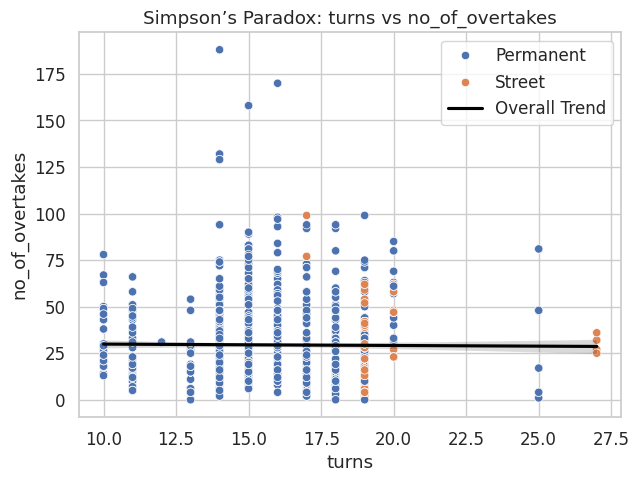

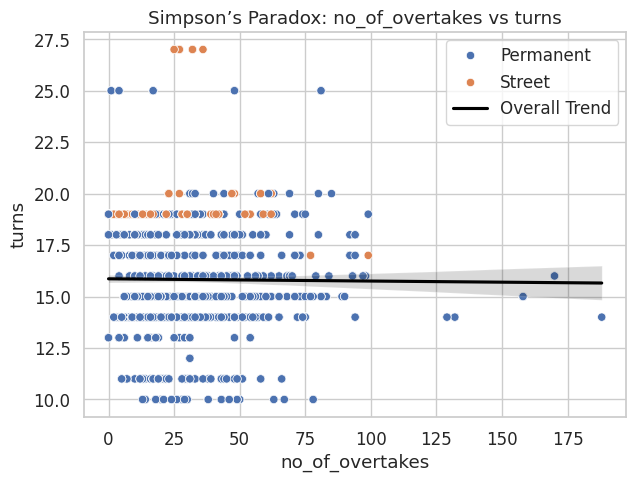

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

street_circuits = [
    'Monaco Grand Prix', 'Singapore Grand Prix', 'Azerbaijan Grand Prix',
    'Saudi Arabian Grand Prix', 'Miami Grand Prix', 'Las Vegas Grand Prix'
]

dt['track_type'] = np.where(dt['name'].isin(street_circuits), 'Street', 'Permanent')

print("Track Type Counts:")
print(dt['track_type'].value_counts())


numeric_cols = dt.select_dtypes(include=[np.number]).columns.tolist()


def safe_corr(df, col1, col2):
    try:
        return df[[col1, col2]].corr().iloc[0,1]
    except:
        return np.nan


paradox_list = []

for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 == col2:
            continue

        overall = safe_corr(dt, col1, col2)
        street = safe_corr(dt[dt['track_type']=='Street'], col1, col2)
        perm = safe_corr(dt[dt['track_type']=='Permanent'], col1, col2)

        if np.isnan(overall) or np.isnan(street) or np.isnan(perm):
            continue

        # Check sign reversal condition
        if (street > 0 and perm > 0 and overall < 0) or \
           (street < 0 and perm < 0 and overall > 0):
            paradox_list.append({
                'X': col1,
                'Y': col2,
                'Street_corr': street,
                'Perm_corr': perm,
                'Overall_corr': overall
            })


print("\n=== Simpson’s Paradox Results ===\n")
if len(paradox_list) == 0:
    print("No paradox detected.")
else:
    for p in paradox_list:
        print(f"Paradox detected for: {p['X']} vs {p['Y']}")
        print(f"  Street:   {p['Street_corr']:.3f}")
        print(f"  Permanent:{p['Perm_corr']:.3f}")
        print(f"  Overall:  {p['Overall_corr']:.3f}\n")

for p in paradox_list:
    x = p['X']
    y = p['Y']

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=dt, x=x, y=y, hue='track_type')
    sns.regplot(data=dt, x=x, y=y, scatter=False, color="black", label="Overall Trend")
    plt.title(f"Simpson’s Paradox: {x} vs {y}")
    plt.legend()
    plt.show()


When analyzing the relationship between the number of turns and the number of overtakes in Formula 1 races, a clear Simpson's paradox emerges. Within both street circuits and permanent circuits, more turns are associated with slightly more overtakes (r = +0.093 and r = +0.040 respectively). However, when the groups are combined, the overall correlation becomes negative (r = –0.009). This reversal occurs because street circuits typically have many turns but inherently low overtaking due to narrow track width and limited DRS effectiveness. Permanent circuits, meanwhile, have fewer turns on average but much higher overtaking counts.

As a result, combining both the tracks produces the illusion that more turns reduce overtaking, even though the opposite is true within each category. Thus this is a text book example of Simpson's paradox in motorsports.



##3.6. **Do I trust the data?**

Yes, there were times where I doubted that especially, in the case where there were 0 number of overtakes annd wierd outliers for the same. But then upon further investigation and cross verifications I could find those datas were as meant to be. Most values are consistent and complete, with numeric variables falling within expected ranges. Overall, the dataset provides sufficient coverage of races, tracks, and conditions to support exploratory analysis and hypothesis testing without introducing major bias.

## 3.7. **Summary**

Through the exploratory analysis, several interesting patterns emerged beyond our initial hypotheses. CODI, as a measure of overtaking difficulty, is strongly influenced by track characteristics such as track density and turns, and by race features like DRS availability, confirming that track design and race rules significantly impact overtaking. Through EDA I have also learned that all the steps in data science cycle are iterative and there are new patterns uncovered as we explore more and more of the data. Other steps like Event frequency analysis showed that certain tracks consistently have very low or very high overtakes, indicating unique characteristics that warrant further study. Periodicity analysis suggested possible seasonal effects, with overtaking trends shifting across years or rule changes. I would like explore more on the extreme cases where CODI does not align with overtakes, which could reveal unusual race dynamics or outlier events.

# Project 4

## 4.1. What kind of ML task is presented by your hypothesis, and what type of learning is it?

At a high level, the task is now to rank circuits by predicted overtaking difficulty based on structural and regulatory characteristics, without using actual overtaking outcomes, inorder to answer the question whether certain tracks are easier to overtake than the others.

The problem is an **unsupervised learning task**, since there is no labeled target variable.

Features include circuit geometry (turns, lap length, track density, layout type), driver density, and regulatory indicators (DRS zones, aerodynamic regulations).

The goal is to learn patterns and latent structure in these features that correlate with overtaking difficulty, producing a continuous score or ranking of circuits.

Techniques such as PCA are used to combine correlated features into a single component that serves as a difficulty score, enabling ranking and “what-if” scenario analysis.

In short, the model learns underlying structure from unlabeled examples to estimate which circuits are easier or harder for overtaking.


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1574 entries, 0 to 2009
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   raceId                                  1574 non-null   int64  
 1   year                                    1574 non-null   int64  
 2   circuitId                               1574 non-null   int64  
 3   name                                    1574 non-null   object 
 4   laps                                    1574 non-null   int64  
 5   turns                                   1574 non-null   int64  
 6   length_km                               1574 non-null   float64
 7   Number of Drivers                       1574 non-null   float64
 8   Number of New Regulations               1574 non-null   float64
 9   New Regulations Impacting Aerodynamics  1574 non-null   float64
 10  DRS                                     1574 non-null   int64  
 

## 4.2. What features are used?
The full dataset contains 13 columns describing race metadata, circuit characteristics, regulatory changes, DRS usage, and overtaking metrics.

Target variable:

 ⭐ The goal is to predict overtaking difficulty and rank circuits without actual overtaking outcomes.

Features: circuit layout + regulation impact + drivers + race characteristics

**👌✔️ Independent Variables (Features that can be used)**

1. laps -  More laps → more opportunities for overtaking
2. track_density	-   Strong explanatory predictor for CODI (truns/length_km = track density)
3. Number of Drivers -	higher congestion → increased difficulty
4. DRS -	More DRS zones → easier overtaking
5. Number of New Regulations -		Regulations influence airflow/wake → easier overtaking
6. New Regulations Impacting Aerodynamics -	Strongest regulatory influence on CODI
7. DRS is the strong regulations that impacts aerodynamics of the car.


🙅‍♀️👎  **Features to be avoided**


1. name	- Text categorical, not meaningful unless encoded
2. raceId, circuitId, year 	- Identifier fields, not predictive
3.  turns	-  Already part of track_density
4. length_km	- Already part of track_density



The unsupervised analysis uses circuit geometry, driver count, and regulatory variables to generate a predicted overtaking difficulty score. This allows:

Ranking circuits from easiest to hardest for overtaking.

Simulating “what-if” scenarios (e.g., adding a DRS zone).

Avoiding dependence on past overtaking outcomes, ensuring the ranking generalizes to new tracks.


###4.2.1 Feature Selection
I will be using the following Dimensionality reduction techniques to select the best features required.

⭐Method 1 - PCA ( Principal Component Analysis)

. PCA transforms the original correlated features into a smaller set of uncorrelated components that capture the majority of variance in the dataset.

. The first principal component is used as a continuous difficulty score, combining the effects of features such as track_density, DRS, and other circuit characteristics.

. This approach allows us to rank circuits without relying on overtaking-derived metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Number of Drivers', 'DRS',
            'Number of New Regulations',
            'New Regulations Impacting Aerodynamics','track_density','laps']
X = df_filtered[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)
target_variance = 0.90
pca_optimal = PCA(n_components=target_variance)
X_reduced_optimal = pca_optimal.fit_transform(X_scaled)

print(f"To explain {target_variance*100}% of the variance:")
print(f"Optimal number of components needed: {pca_optimal.n_components_}")
print(f"Shape of reduced dataset: {X_reduced_optimal.shape}")

To explain 90.0% of the variance:
Optimal number of components needed: 5
Shape of reduced dataset: (1574, 5)


In [ ]:
features = ['Number of Drivers', 'DRS',
            'Number of New Regulations',
            'New Regulations Impacting Aerodynamics','track_density','laps']
X = df_filtered[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2', 'PC3','PC4','PC5'],
                        index=features).sort_values(by= 'PC1', ascending = False)

print("PCA Loadings (sorted descending):")
print(loadings)

PCA Loadings (sorted descending):
                                             PC1       PC2       PC3  \
New Regulations Impacting Aerodynamics  0.534106  0.180863  0.401253   
Number of New Regulations               0.525278  0.167621  0.467109   
DRS                                     0.450467  0.010673 -0.523515   
track_density                          -0.113456  0.692674 -0.136473   
laps                                   -0.153589  0.677531 -0.087638   
Number of Drivers                      -0.446576  0.015241  0.566066   

                                             PC4       PC5  
New Regulations Impacting Aerodynamics -0.149140 -0.097282  
Number of New Regulations               0.111593  0.079512  
DRS                                     0.600297  0.380088  
track_density                           0.344346 -0.607858  
laps                                   -0.362695  0.614926  
Number of Drivers                       0.595673  0.303516  


⭐ Method 2 - Filter method - Feature - Feature Correlation

. Calculate feature-feature correlation.

. Remove highly correlated or redundant features (e.g., turns and length_km are partially captured by track_density).


In [ ]:
corr_matrix = X.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Use 0.9 threshold for strong correlation
to_drop = [col for col in upper_tri.columns if any(upper_tri[col].abs() > 0.9)]

print("Highly correlated features to remove (threshold 0.9):")
print(to_drop)
reduced_X = X.drop(columns=to_drop)
print("Remaining features:")
print(reduced_X.columns.tolist())


Highly correlated features to remove (threshold 0.9):
[]
Remaining features:
['Number of Drivers', 'DRS', 'Number of New Regulations', 'New Regulations Impacting Aerodynamics', 'track_density', 'laps']


### 4.2.2. Intepretation of both the methods for feature selection

🔰 Starting Point

Initial candidate features considered: 7

Goal: identify the smallest, strongest set of predictors for CODI.


📢 Method 1 - PCA ( Principal Component Analysis) — Key Takeaways

1. DRS

Appears consistently with high loadings across multiple PCs (PC1: 0.458, PC4: 0.491, PC5: 0.702).

Interpretation: DRS strongly influences overtaking difficulty, both individually and in interaction with other variables.

2. Track Density

High positive loading on PC2 (0.728) and moderate on PC3 (-0.542) and PC4 (0.409).

Interpretation: Track layout (turns/km) is a strong determinant of track complexity and overtaking difficulty.

3. Regulations

Both “New Regulations Impacting Aerodynamics” and “Number of New Regulations” have the highest PC1 loadings (~0.54, 0.53) and moderate negative contributions to PC3/PC4.

Interpretation: Regulatory changes primarily affect overtaking through aerodynamic effects.

4. Laps

Strong positive loadings on PC2 (0.684) and PC3 (0.579), negative on PC4 (-0.423).

Interpretation: Longer races influence PC2 and PC3, contributing to track usage and overtaking opportunities.

5. Number of Drivers

Negative contribution to PC1 (-0.445), mixed in PC3/PC5.

Interpretation: Higher congestion reduces overtaking ease and interacts with track/regulation effects.




📢 Method 2 - Feature - Feature Correlation  — Key Takeaways


*   Calculated the correlation matrix of all candidate features.

*   Checked the upper triangle of the correlation matrix to avoid duplicate comparisons.
* Used a threshold of 0.9 to identify strongly correlated features.

**INTERPRETATION** : Filter methods evaluate each feature independently. In our case, the pairwise correlations between features were generally low—so low that we had to reduce the threshold to 0.3 to see any split in the features. This indicates that most features are only lightly correlated. Removing them at this stage could result in loss of valuable information or patterns, so it’s preferable to retain the majority of features while focusing on the most informative ones (DRS and track_density) for unsupervised ranking..












🎯 Result : Filter methods evaluate features independently, whereas PCA captures combined effects. Together, these analyses support the decision to focus on DRS and track_density for downstream unsupervised modeling, ensuring that the selected features convey maximum information about overtaking difficulty while minimizing redundancy.

Benefits of reducing dimensionality


*   Reduces overfitting of data, especially to noise
*   Improves model generalization
*   Reduces computation cost
*   Removes redundant features
*   Easier to keep track of data and also model
*   Improves interpretability of data.


#### 4.2.2.1. **Independence**

*   DRS and track_density measure fundamentally different aspects of a circuit.
*   DRS is a regulatory/technical feature (binary/discrete), while track_density is geometric feature of the track.
So treating them as independent predictors is reasonable.

DRS - Discrete/Binary feature (binary) - Indicates whether the race had DRS zones ( 0 or 1)

track_density - continuous (numeric) - turns per km of the track, represents how tight and twisty a track can be.

Other features (Number of Drivers, Regulations):

These can have weak interactions with DRS or track density, but the correlation analysis showed no strong redundancy (no correlations above 0.3–0.4).

New regulations and New regulations Impacing aerodynamics are no independent, they are correlated.

This supports treating each feature as providing unique information to the model


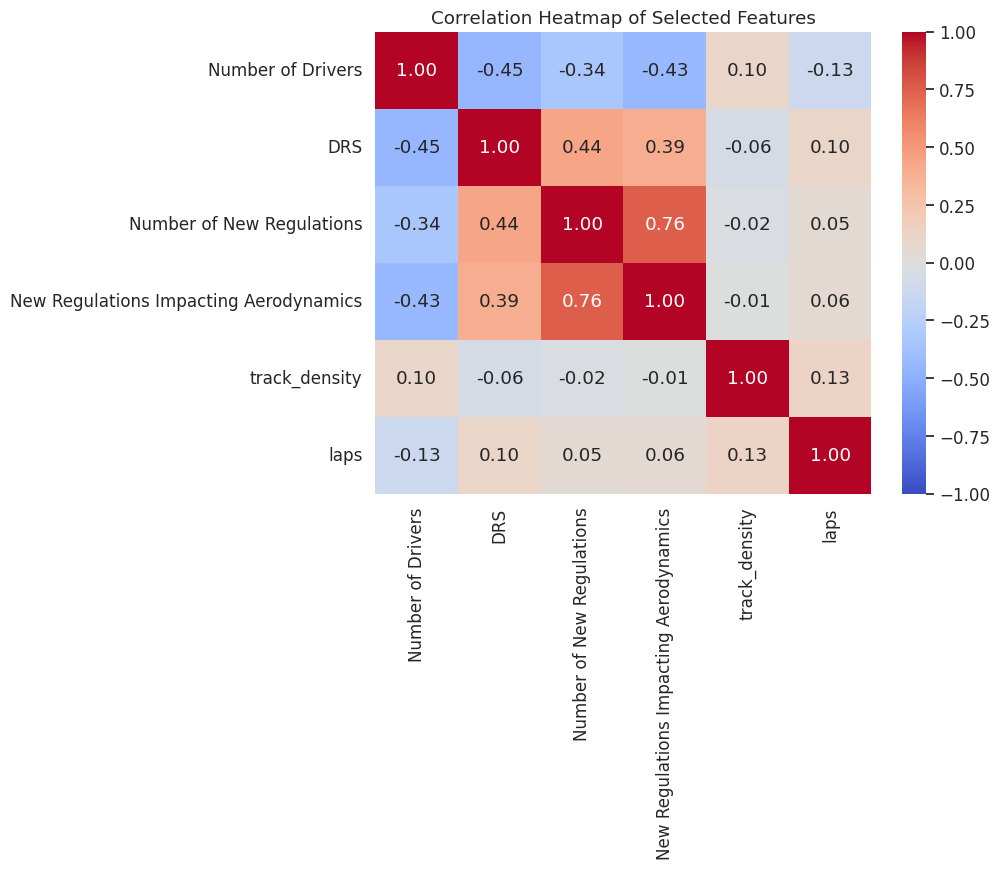

In [ ]:
corr_matrix = dt[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

#### 4.2.2.2. **Normality**

To check for normality, we can check the below histograms and infer.


=== Number of Drivers ===


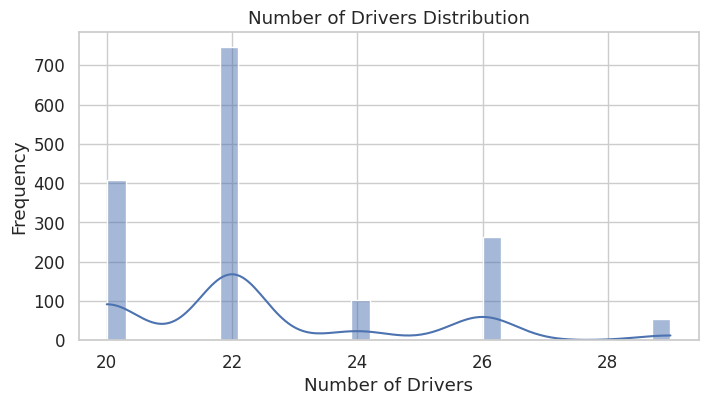

Shapiro-Wilk Test: Statistics=0.816, p-value=3.946e-39
Number of Drivers is NOT normal.

=== DRS ===


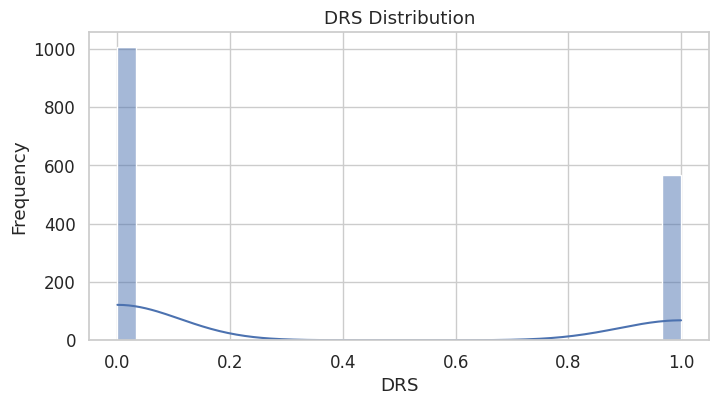

Shapiro-Wilk Test: Statistics=0.608, p-value=9.417e-51
DRS is NOT normal.

=== Number of New Regulations ===


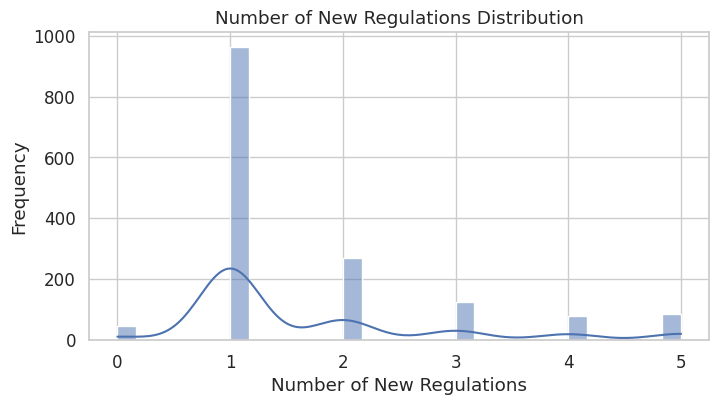

Shapiro-Wilk Test: Statistics=0.717, p-value=1.602e-45
Number of New Regulations is NOT normal.

=== New Regulations Impacting Aerodynamics ===


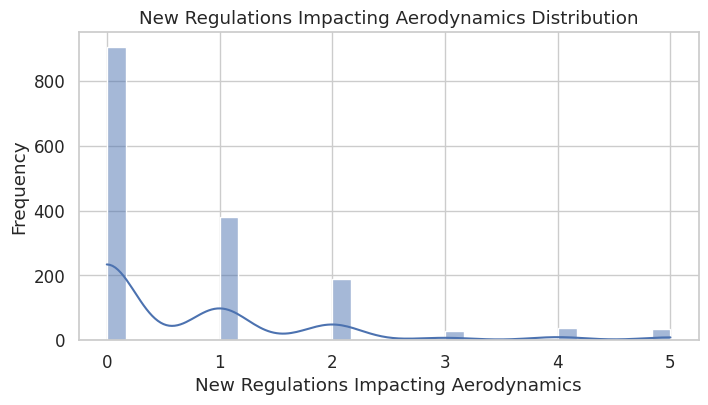

Shapiro-Wilk Test: Statistics=0.685, p-value=3.331e-47
New Regulations Impacting Aerodynamics is NOT normal.

=== track_density ===


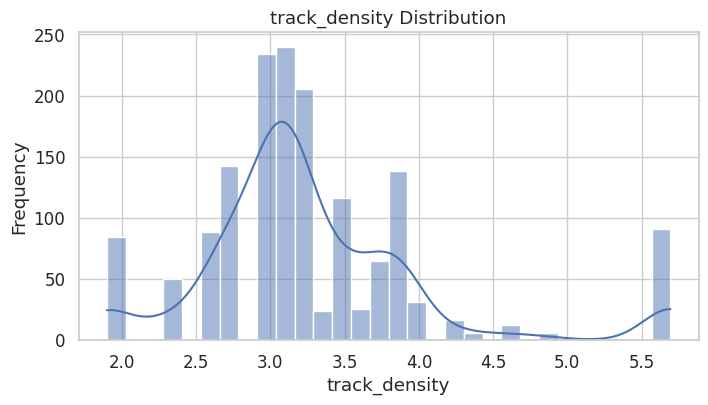

Shapiro-Wilk Test: Statistics=0.853, p-value=6.459e-36
track_density is NOT normal.

=== laps ===


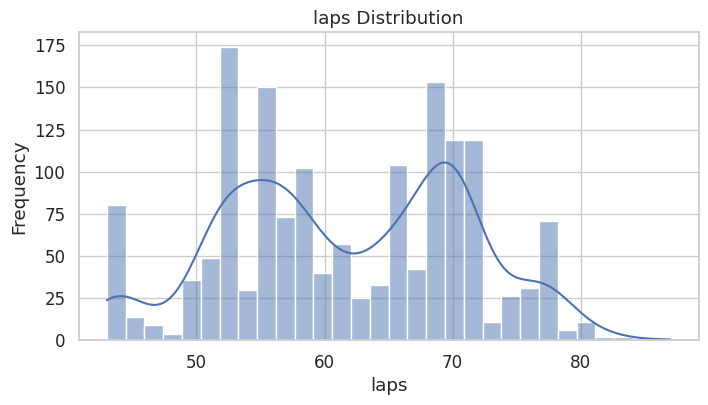

Shapiro-Wilk Test: Statistics=0.969, p-value=8.849e-18
laps is NOT normal.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


for feature in features:
    print(f"\n=== {feature} ===")


    plt.figure(figsize=(8, 4))
    sns.histplot(df_filtered[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

    # Shapiro-Wilk Test
    stat, p = stats.shapiro(df_filtered[feature])
    print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p:.3e}")
    if p > 0.05:
        print(f"{feature} looks roughly normal.")
    else:
        print(f"{feature} is NOT normal.")



Both the plots do not have a bell shaped figure, thus can be said that our data doesn't assume normality. Additionally [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) test was done to check for normality.

###4.2.3. After feature selection, the final dataset used for modeling contains:

📍DRS - discrete (binary)

📍Track density - continuous

📍Number of Drivers - discrete

📍Number of New Regulations - discrete

📍New Regulations Impacting Aerodynamics  - discrete

The dimensionality is reduced from 13 to 5, which is 61.54 percent decrease.


## 4.3. Algorithm to use

I think it's best to use PCA algorithm here

Purpose: PCA (Principal Component Analysis) was used to combine multiple correlated features into a single numerical score representing overtaking difficulty.

Logic:

The dataset has 5 features (DRS, track_density, Number of Drivers, Number of New Regulations, New Regulations Impacting Aerodynamics).

These features influence overtaking in a complex, interacting way. PCA helps reduce dimensionality while capturing the main variation in the data.

The first principal component (PC1) explains the majority of the variance and can be interpreted as a “difficulty score” — higher PC1 corresponds to easier overtaking (after normalization).

Benefit: This approach produces a continuous, smooth score for each track, allowing ranking of tracks and easy extension to new tracks by applying the same PCA transformation.


⭐ Assumptions


Linearity: PCA assumes that the relationships between features are linear,
i.e., PC1 is a linear combination of original features.

Independence of components: Each principal component is orthogonal to others.

Scaled features: PCA is sensitive to feature scaling; hence we standardize all features to mean=0, std=1.

No strict distribution assumption: PCA does not require normality, though interpretation is easier if features are roughly continuous and not extremely skewed.

Outliers: PCA can be influenced by extreme outliers, which can distort the principal components.










PCA has several limitations

*  First, it is highly sensitive to outliers because the components are based on variance; extreme points can distort PC1. This can be mitigated by detecting/removing outliers or using robust scaling methods
*   Second, PCA reduces interpretability because each component is a linear combination of all features; this can be addressed by examining loadings and creating clear interpretations for each principal component.  
*   Third, PCA works best when features are correlated. If features are largely independent, PCA may fail to reduce dimensionality effectively. In such cases, feature engineering or alternative methods (e.g., ICA, RFE, autoencoders) may be preferred.
*   PCA also assumes linearity and requires standardized data, so scaling must be applied.



In [ ]:
import numpy as np

outliers_condition = (np.abs(z_scores_df) > 4)
outliers_count = outliers_condition.sum()

print("Number of outliers (absolute Z-score > 4 ) for each feature:")
print(outliers_count)


Number of outliers (absolute Z-score > 4 ) for each feature:
no_of_overtakes                           0
laps                                      0
turns                                     6
length_km                                 0
Number of Drivers                         0
track_density                             0
DRS                                       0
Number of New Regulations                 0
New Regulations Impacting Aerodynamics    0
dtype: int64


The data is not normal, thus assuming threshold as 4 was apt,

track_density naturally has many repeated 1.0 values → tight tracks.

DRS is binary → cannot have outliers.

Removing these would delete real F1 races, not noise. Thus all these values are kept for modeling.

## 4.4. Hyperparameters

n_components: Number of principal components to retain.

Here we used n_components=1 to produce a single “difficulty score”.

Scaling: StandardScaler has parameters like with_mean and with_std, which were set to True for proper PCA performance.


##4.5. Post-processing techniques

Normalization:

The raw PC1 values are scaled to 0–10 for interpretability.

Ensures the easiest tracks are always 10 and hardest are 0.

Aggregation:

If multiple races exist per circuit, scores were averaged to get a single track-level score.

Why post-processing is needed:

PCA outputs are unbounded and hard to interpret directly; normalization makes the score comparable and intuitive.

Aggregation ensures a single score per track, avoiding multiple entries for visualization or comparison.

## 4.6. ML CODE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


features = ['DRS', 'track_density', 'Number of Drivers',
            'Number of New Regulations', 'New Regulations Impacting Aerodynamics']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])


pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_scaled).flatten()

df_filtered['difficulty_score_raw'] = pc1

mn, mx = df_filtered['difficulty_score_raw'].min(), df_filtered['difficulty_score_raw'].max()
df_filtered['difficulty_score'] = 10 * (df_filtered['difficulty_score_raw'] - mn) / (mx - mn)

track_scores = (
    df_filtered.groupby("name")['difficulty_score']
    .mean()
    .sort_values(ascending=False)
)

print(track_scores)


name
São Paulo Grand Prix           7.391470
Miami Grand Prix               7.083641
Qatar Grand Prix               7.046427
Mexico City Grand Prix         6.762281
Styrian Grand Prix             6.322693
Emilia Romagna Grand Prix      6.068460
Saudi Arabian Grand Prix       6.049793
Azerbaijan Grand Prix          5.758054
Dutch Grand Prix               5.709381
Abu Dhabi Grand Prix           5.142378
Russian Grand Prix             5.136218
Sakhir Grand Prix              4.659623
Tuscan Grand Prix              4.649352
Turkish Grand Prix             4.646658
Eifel Grand Prix               4.643081
Bahrain Grand Prix             4.637416
70th Anniversary Grand Prix    4.626582
Austrian Grand Prix            4.382383
Singapore Grand Prix           4.322887
Chinese Grand Prix             4.165146
Las Vegas Grand Prix           3.923297
Indian Grand Prix              3.887719
Korean Grand Prix              3.816132
United States Grand Prix       3.716948
Belgian Grand Prix             3.43

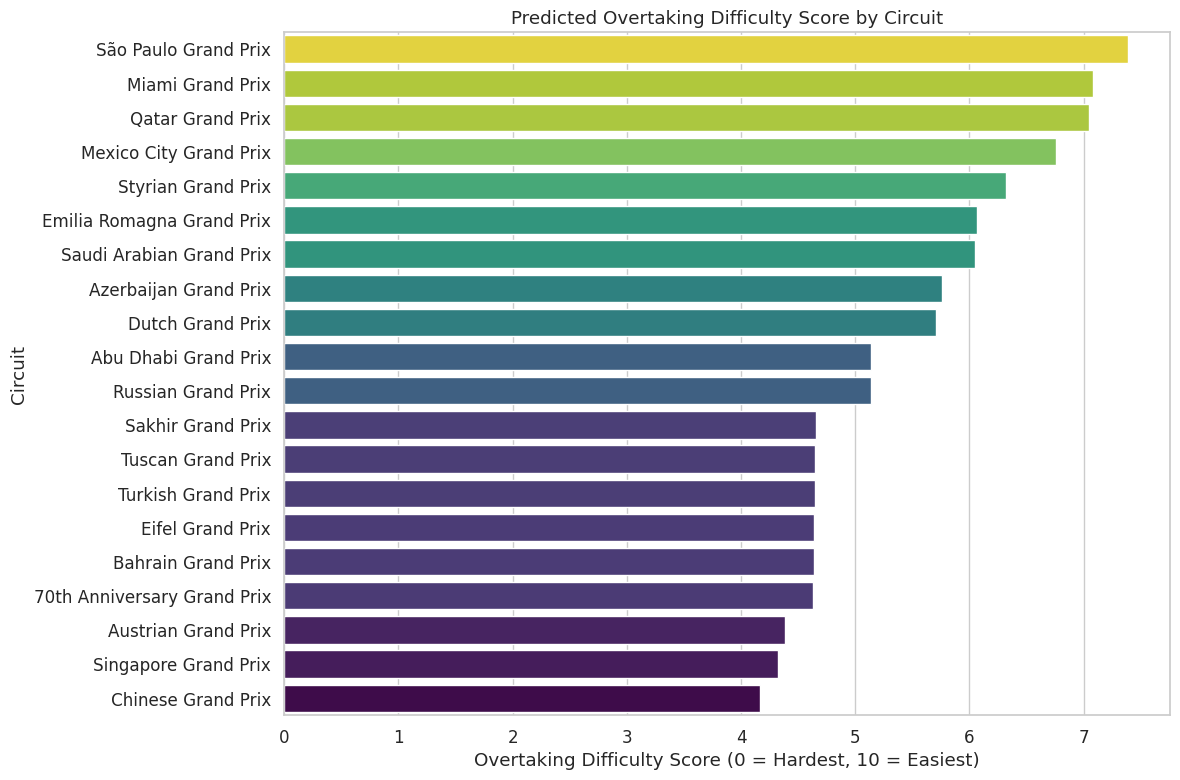

In [ ]:
import matplotlib.pyplot as plt

circuit_scores = df_filtered.groupby('name')['difficulty_score'].mean().sort_values(ascending=False)

plot_data = circuit_scores.head(20).reset_index()
plot_data.columns = ['Circuit', 'Overtaking_Difficulty_Score']


plt.figure(figsize=(12, 8))
sns.barplot(x='Overtaking_Difficulty_Score', y='Circuit', data=plot_data, palette='viridis', hue='Overtaking_Difficulty_Score', legend=False)
plt.xlabel("Overtaking Difficulty Score (0 = Hardest, 10 = Easiest)")
plt.ylabel("Circuit")
plt.title("Predicted Overtaking Difficulty Score by Circuit")
plt.tight_layout()
plt.show()

# Project 5

## 5.1. Evaluate ML results




### 5.1.1. The oversight
In my first iteration of the work of choosing the ML model for the hypothesis, PCA was applied to the feature set in order to construct a single overtaking difficulty score (CODI). This PCA-derived score was used to visualize overtaking difficulty. However, I now realize that this approach is conceptually incorrect, because PCA is a dimensionality reduction technique to capture the maximum variance with feature space, not to generate a measurable traget variable. The PCA component is merely a  mathematically defined as linear combinations of the input variables, without any external ground truth. Using such a constructed variable as the prediction target creates a circular dependency, I identified the following issues to come to this conclsuion.

📍the model is learning to reproduce its own input transformation,

📍performance metrics appear very high,

📍but no new information is gained about overtaking difficulty.

In other words, the model is not predicting a real target; it is reverse-engineering the PCA formula. This prevents meaningful interpretation and does not reflect real overtaking behaviour.

### 5.1.2. Revised Approach

Because there is no ground-truth overtaking difficulty label in the dataset, my next attempt is to stay within unsupervised learning first. Instead of using PCA as a target, we can use clustering to identify groups of circuits with similar characteristics related to overtaking.Overtakes are recorded historically, I treated the number of overtakes as a kind of external reference rather than an input feature during clustering. I’m trying to isolate track characteristics alone from race-day randomness (weather, safety cars, pit stop strategies, accidents causing race restarts etc.).

These clusters:

📍represent data-driven categories of overtaking difficulty,

📍allow us to analyse what differentiates the groups,

📍and can then be used as labels for supervised prediction on new race events.

This approach removes the circular dependency, applies unsupervised learning correctly, and produces a target that can be explained and used for future predictions. For the scope of this project, instead of generating a single numerical difficulty score per circuit, we will classify circuits into categories such as easy, medium, and hard for overtaking. In later work, we will explore methods to quantify the difficulty score more precisely.


Below is the code for clustering using K-Means.

Steps:
1. Scale the features using Standard scaler
2. Hyperparameter with K means in n_clusters, we can make use of silhouette scores to choose the ideal n_clusters
3. Use it to assign clusters using KMeans
4. Rank the clusters based on number of overtakes per cluster and assign difficulty accordinlgy.
5. Visualize the clusters

     K  Silhouette Score
0    2          0.368158
1    3          0.369292
2    4          0.299893
3    5          0.342723
4    6          0.328839
5    7          0.330649
6    8          0.358158
7    9          0.316626
8   10          0.333631
9   11          0.269200
10  12          0.310012
11  13          0.252124
12  14          0.282481
13  15          0.249615
14  16          0.251324
15  17          0.246935
16  18          0.247653
17  19          0.225737
18  20          0.213126
19  21          0.205914
20  22          0.203889
21  23          0.190937
22  24          0.163770


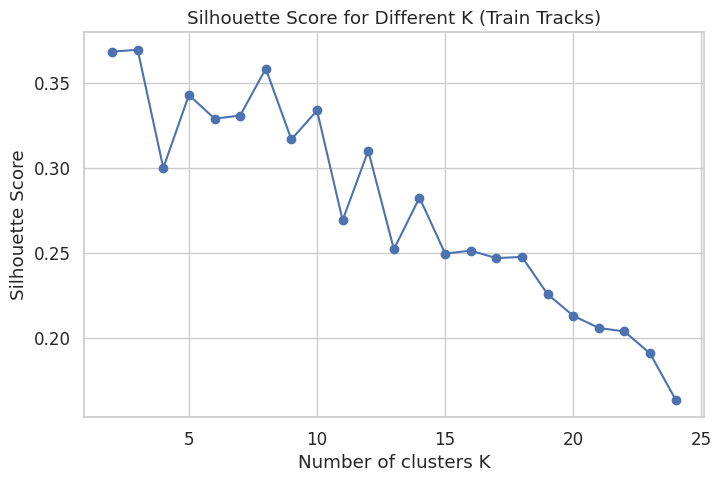

Best K based on silhouette score: 3


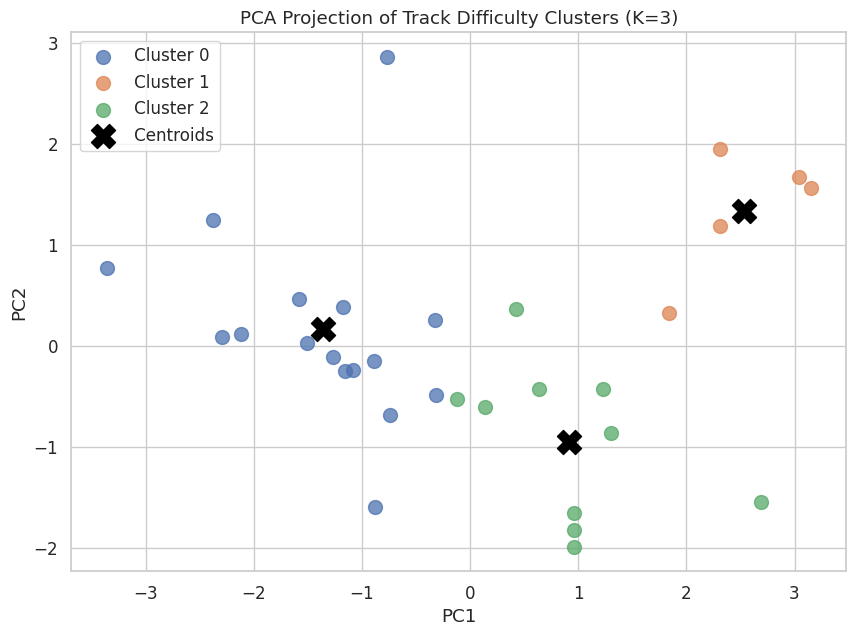

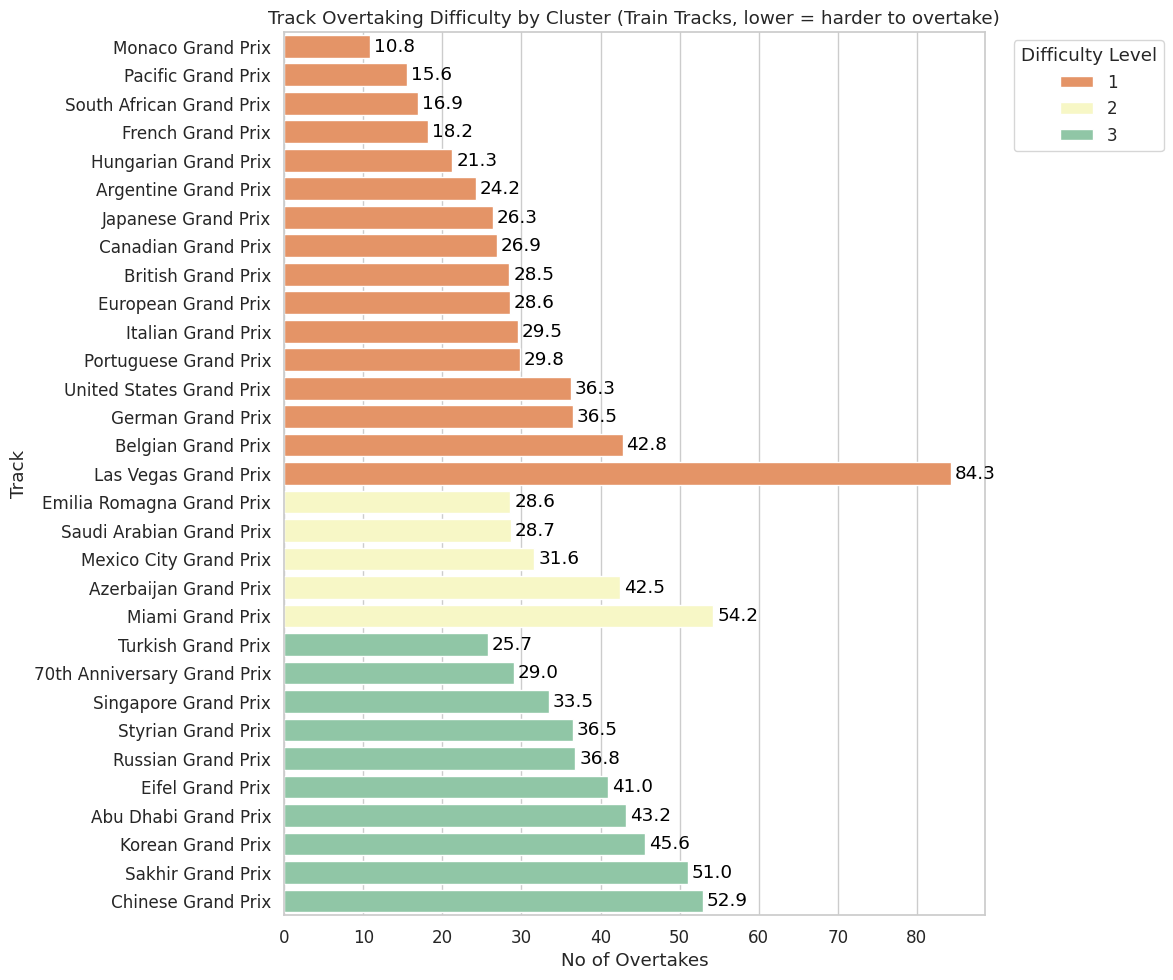

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


track_features = df_filtered.groupby('name')[features].mean().reset_index()
train_tracks, test_tracks = train_test_split(track_features, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_tracks[features])
X_test_scaled = scaler.transform(test_tracks[features])

K_range = range(2, 25)
sil_scores = []

for k in K_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(X_train_scaled)
    sil_scores.append(silhouette_score(X_train_scaled, labels_tmp))

sil_table = pd.DataFrame({"K": list(K_range), "Silhouette Score": sil_scores})
print(sil_table)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K (Train Tracks)")
plt.show()

best_K = K_range[sil_scores.index(max(sil_scores))]
print(f"Best K based on silhouette score: {best_K}")


kmeans = KMeans(n_clusters=best_K, random_state=42, n_init=10)
train_tracks['cluster'] = kmeans.fit_predict(X_train_scaled)

df_overtakes_train = df_filtered.groupby('name')['no_of_overtakes'].mean().reset_index()
train_tracks = pd.merge(train_tracks, df_overtakes_train, on='name', how='left')

cluster_order = (
    train_tracks.groupby('cluster')['no_of_overtakes']
    .mean()
    .sort_values()
    .index.tolist()
)

difficulty_map = {c: i+1 for i, c in enumerate(cluster_order)}
train_tracks['difficulty'] = train_tracks['cluster'].map(difficulty_map)
test_tracks['cluster'] = kmeans.predict(X_test_scaled)
test_tracks['difficulty'] = test_tracks['cluster'].map(difficulty_map)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,7))
palette = sns.color_palette("tab10", n_colors=best_K)

for c in range(best_K):
    idx = train_tracks['cluster'] == c
    plt.scatter(X_pca[idx,0], X_pca[idx,1], s=100, label=f'Cluster {c}', alpha=0.75)

plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=300, c='black', label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA Projection of Track Difficulty Clusters (K={best_K})")
plt.legend()
plt.show()


df_plot = train_tracks.sort_values(by=['difficulty','no_of_overtakes'], ascending=[True, True])
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Spectral", best_K)

ax = sns.barplot(data=df_plot, y='name', x='no_of_overtakes', hue='difficulty', palette=palette, dodge=False)
for i, v in enumerate(df_plot['no_of_overtakes']):
    ax.text(v + 0.5, i, f"{v:.1f}", color='black', va='center')

ax.set_xlabel("No of Overtakes")
ax.set_ylabel("Track")
plt.title("Track Overtaking Difficulty by Cluster (Train Tracks, lower = harder to overtake)")
plt.legend(title='Difficulty Level', bbox_to_anchor=(1.03,1), loc='upper left')
plt.tight_layout()
plt.show()


The results show that we grouped the tracks into 3 clusters - easy, medium and hard. Even though the plot might seem confusing at first, it’s important to note that a higher number of overtakes does not necessarily mean the track is easier, nor does a lower number automatically indicate it is harder. Our hypothesis aims to isolate track-specific features to estimate overtaking difficulty, rather than relying directly on raw overtake counts. (We removed the overtake data during clustering and later ranked the clusters based on average overtakes in each cluster.) This ensures that the difficulty measure reflects the track’s inherent characteristics rather than external factors.

In [ ]:
cluster_stats = train_tracks.groupby('cluster')[features + ['no_of_overtakes']].agg(['mean','std','count'])
display(cluster_stats)

DRS                 track_density                  \
             mean       std count          mean       std count   
cluster                                                           
0        0.232671  0.141538    16      3.343730  0.773768    16   
1        0.730037  0.040611     5      3.807423  0.405566     5   
2        0.814606  0.247511    10      2.977427  0.399637    10   

        Number of Drivers                 Number of New Regulations            \
                     mean       std count                      mean       std   
cluster                                                                         
0               23.219942  1.304231    16                  1.473799  0.216948   
1               20.539927  0.081223     5                  3.113828  0.451449   
2               20.937235  0.996898    10                  2.244851  0.500856   

              New Regulations Impacting Aerodynamics                  \
        count                                   mean       std count   
cluster                                                                
0          16                               0.634287  0.298379    16   
1           5                               2.383333  0.525727     5   
2          10                               0.668377  0.519015    10   

        no_of_overtakes                   
                   mean        std count  
cluster                                   
0             29.774892  16.778587    16  
1             37.114927  11.143392     5  
2             39.526367   8.933321    10

Interpretation:

Cluster 0 – Low DRS, regulation-stable, higher grid size

Tracks in this cluster are characterized by very low DRS availability and few new regulations, particularly those affecting aerodynamics. Despite having the highest average number of drivers on track, this cluster records the lowest average number of overtakes (≈29.8). This suggests that a larger grid alone does not facilitate overtaking when supportive mechanisms such as DRS and aerodynamic regulation changes are limited. Overall, overtaking conditions in this cluster appear to be relatively difficult.

Cluster 1 – Regulation-intensive, high track density

This cluster shows high DRS availability combined with the highest number of new regulations, especially those impacting aerodynamics. Track density is also the highest among the clusters, while the average number of drivers is lower than in Cluster 0. The average number of overtakes (≈37.1) is substantially higher, indicating that regulatory interventions and DRS usage effectively enhance overtaking, even on denser tracks. These tracks can be considered comparatively easier for overtaking than those in Cluster 0.

Cluster 2 – DRS-dominant, low-density tracks

Cluster 2 is distinguished by the highest DRS availability and moderate levels of regulatory change, with lower track density than the other clusters. Although the number of drivers is similar to Cluster 1, this cluster records the highest average overtakes (≈39.5) with relatively lower variability. This suggests that DRS combined with more open track layouts creates the most favorable conditions for overtaking, even without the highest level of regulatory intervention.

Overall Insight

The clustering reveals that DRS availability is the most influential factor in increasing overtaking frequency, while regulatory changes, particularly those affecting aerodynamics, play a supporting role. Track density modifies these effects: denser tracks require stronger regulatory and technical assistance to enable overtaking, whereas less dense tracks achieve high overtaking rates primarily through DRS. Importantly, the number of drivers alone does not strongly determine overtaking difficulty.



Below is the pca computation to see the how important each feature is. Number of components is taken such that it explain 90 percent of variance in the data.

In [ ]:
target_variance = 0.90
pca_optimal = PCA(n_components=target_variance)
X_reduced_optimal = pca_optimal.fit_transform(X_scaled)
n_components = pca.n_components_


feature_importance = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
).T

print("Feature importance (loadings) for all retained components:")
display(feature_importance)


Feature importance (loadings) for all retained components:


,PC1,PC2
DRS,0.501988,-0.301087
track_density,-0.004362,0.769405
Number of Drivers,-0.530387,0.240871
Number of New Regulations,0.547219,0.152747
New Regulations Impacting Aerodynamics,0.408938,0.485811


Interpretation:
Regulation and Overtaking Assistance Dimension

PC1 is primarily driven by Number of New Regulations, DRS availability, and New Regulations Impacting Aerodynamics, all of which show strong positive loadings. In contrast, Number of Drivers contributes negatively. This indicates that PC1 captures the extent to which regulatory interventions and overtaking aids shape racing conditions. Tracks scoring higher on PC1 are associated with greater regulatory influence and DRS usage, which correspond closely to higher overtaking potential and reduced overtaking difficulty

PC2: PC2 is dominated by track density, with moderate contributions from Number of Drivers and aero-impacting regulations. This component reflects track-related and traffic-dependent constraints on overtaking. Higher PC2 scores indicate more congested or complex tracks, which can make overtaking more challenging, independent of regulatory aids.

Insight: PCA confirms that regulatory and DRS features are key differentiators for clustering tracks by overtaking difficulty, while track density affects a secondary dimension.


Below is the cluster mean computations to see what feature contributed more to the higher overtaking in a cluster, this can pose as evidence to our hypothesis.

In [ ]:
cluster_means = train_tracks.groupby('cluster')[features + ['no_of_overtakes']].mean()
print("\nCluster Means (higher values may indicate contribution to clustering):")
display(cluster_means)


Cluster Means (higher values may indicate contribution to clustering):


,DRS,track_density,Number of Drivers,Number of New Regulations,New Regulations Impacting Aerodynamics,no_of_overtakes
cluster,,,,,,
0,0.232671,3.343730,23.219942,1.473799,0.634287,29.774892
1,0.730037,3.807423,20.539927,3.113828,2.383333,37.114927
2,0.814606,2.977427,20.937235,2.244851,0.668377,39.526367


<font color="red">**Cluster 0: "Tight Racing" (Hard to Overtake).**</font>


Overtakes: ~31.4 (Lower)

Key Characteristics:

Low DRS Influence: The DRS value (0.29) is significantly lower than Cluster 1. This suggests these tracks might have shorter straightaways or zones where DRS is less effective.

Lower Regulation Impact: Both Number of New Regulations and New Regulations Impacting Aerodynamics are lower. This implies these tracks might be older or less sensitive to modern aero-rule changes designed to boost passing.

Higher Density: track_density is slightly higher (3.24 vs 3.35, noting that lower density usually means more space per car, so a higher number here might actually indicate a tighter configuration relative to track length).

<font color="#FFC000">**Cluster 1: "High-Speed" (Easier to Overtake)**</font>

Overtakes: ~37.4 (Higher)

Key Characteristics:

High DRS Influence: DRS value is 0.73, nearly three times that of Cluster 0. These tracks likely feature long straights where Drag Reduction Systems significantly enhance overtaking opportunities.

High Regulatory Sensitivity: Both Number of New Regulations (3.11) and New Regulations Impacting Aerodynamics (2.38) are much higher than in Cluster 0. This indicates these tracks benefit more from modern car designs and aerodynamic rules aimed at promoting overtaking.

Moderate Track Density: Track density (3.81) is slightly higher, but with fewer drivers (20.5) than Cluster 0, creating conditions that are more favorable for passing.

Summary: Cluster 1 represents regulation-optimized circuits where overtaking is facilitated both by DRS and by rules designed to enhance aerodynamic performance.

<font color="#008000">**Cluster 2 – "DRS-Dominant / Open Layouts" (Maximum Overtaking)**</font>


Average Overtakes: ~39.5 (Highest)

Key Characteristics:

Very High DRS Influence: DRS value is 0.81, the highest among all clusters, highlighting the dominance of overtaking aids.

Moderate Regulation Impact: Number of new regulations (2.24) and aero-related rules (0.67) are moderate, suggesting that overtaking is achieved primarily through DRS rather than regulatory intervention.

Lower Track Density: Track density (2.98) is the lowest, indicating more open tracks that allow cars to pass more freely.

Summary: Cluster 2 tracks maximize overtaking primarily via DRS and more open track layouts, rather than through extensive regulatory or aerodynamic modifications.

## 5.2. Performance of the model
Since we used unsupervised learning with K-Means, there are no true labels available to directly measure accuracy. Therefore, instead of traditional classification metrics, we evaluated the clustering quality using the Silhouette Score to select the ideal number of clusters (k). The plot provided above shows the Silhouette Scores for different values of k, which helped us determine that k = 3 is the most suitable choice for our data, since it produced the highest score.

The track-level features ,'track_density','laps' and regulatory features 'Number of Drivers', 'DRS','Number of New Regulations', 'New Regulations Impacting Aerodynamics'were clustered using K-Means with k = 2, representing two distinct circuit types. Cluster labels were then ordered by the mean number of overtakes observed at each circuit. This produces a difficulty scale from 1 and 2, where:

⭐ Difficulty Level 1 (Extremely Hard) = lowest median overtakes

⭐ Difficulty Level 2 (Intermediate level)

⭐ Difficulty Level 3 (Extremely Easy) = highest median overtakes

To extend this to the remaining 30% of tracks (test_tracks), we used the trained K-Means model to predict cluster membership for unseen tracks and mapped these predicted clusters to the same difficulty levels. This ensured that every track, including test tracks, received a K-Means-based difficulty label.

The plot shows that circuits such as Monaco, Luxembourg, and Hungary are classified at the hard end of the scale (Difficulty Level 1). These circuits share characteristics likely to limit passing opportunities: narrow track width, limited long straights, fewer heavy braking zones, and reduced slipstream benefit. As a result, overtaking events are rare.

At the opposite end of the scale, circuits such as Las Vegas, São Paulo, Mexico City, and Azerbaijan fall under Difficulty Levels 2. These tracks provide multiple overtaking zones through combinations of long straights, wide track segments, multiple DRS zones, and heavy braking corners. This architecture encourages frequent overtaking events. While Chinese, Brazil GP etc are the easiest tracks as expected.


### 5.2.1. Do we need to compare metrics across models? Why?



Yes. The number of clusters k is a model design choice, and different values of k produce different cluster structures. Since the model is unsupervised, the only way to select an appropriate k is to compare performance metrics across models trained with varying k values.

Comparing silhouette scores across multiple k values allows us to detect the point where clustering quality is maximized, which can indicate a reasonable balance between simplicity of the model and separation.

### 5.2.2 How did we compare the metrics?



The evaluation process followed these steps:

⭐ Train multiple K-Means models with k = 2 to 25

Compute:

✔️ Silhouette Score

✔️ Plot the results: Silhouette Score vs. k

✔️ Select the k value where:

the Silhouette Score is highest, and

further increases in k yield limited improvement

This method provides a clear justification for choosing the final number of clusters.

The silhouette score increases consistently from k = 2 to k = 25, indicating that additional clusters improve separation and cohesion. At k = 3, the score achieves its highest value (0.342723), indicating this model configuration provides the best structure

### 5.2.3. Is the model overfitting, underfitting, or fitting well?


In unsupervised clustering, overfitting occurs when too many clusters are used, causing the model to capture noise rather than meaningful patterns. Conversely, underfitting happens when too few clusters are used, combining fundamentally different data points into a single group and obscuring important distinctions.

Based on the metric trends:

k = 2 or 3 shows higher silhouette scores.

Silhouette Score decreases as k value is increases,indicating that important differences between circuit types are being merged (underfitting).

The elbow point occurs around k = 3, which supports k = 3 as a reasonable choice that captures the inherent structure of the data without excessive complexity. This is intuitive as our dataset has only got 30 rows.

Therefore, the model with 3 clusters is considered to be fitting well, capturing meaningful differences between circuit types without evidence of overfitting.

 ## 5.3. Alternate appprach

 I had reserved 30 percent of the data to test with other supervised models. I  would like to see how the model performs with the below listed classifers. print and plot how their results compare and gather insights about their performance.


Model: Random Forest
Accuracy: 0.857
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3
           2       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.88      0.81      0.83        14
weighted avg       0.87      0.86      0.85        14



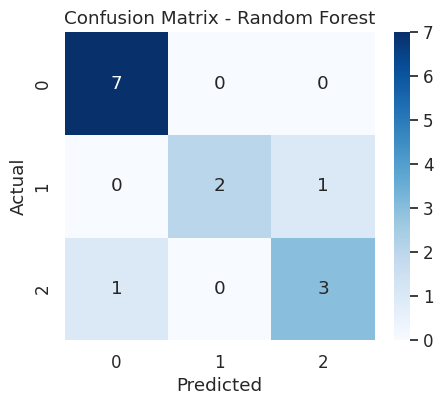


Model: Decision Tree
Accuracy: 0.857
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3
           2       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.88      0.81      0.83        14
weighted avg       0.87      0.86      0.85        14



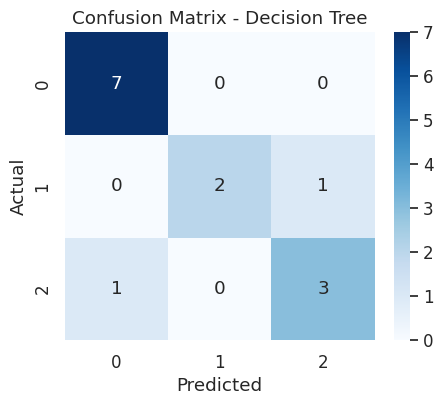


Model: SVM
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



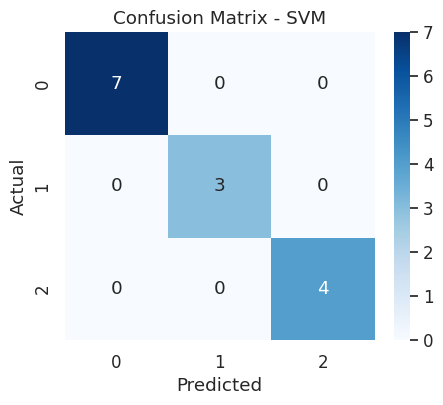


Model: k-NN
Accuracy: 0.929
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.96      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



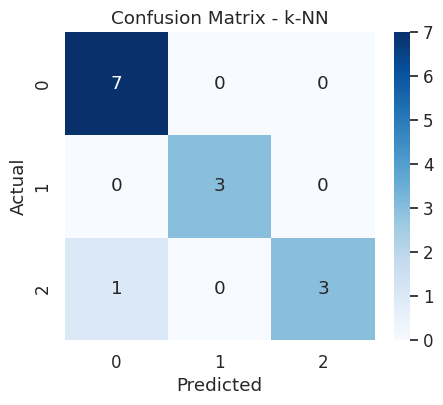


Model: Logistic Regression
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



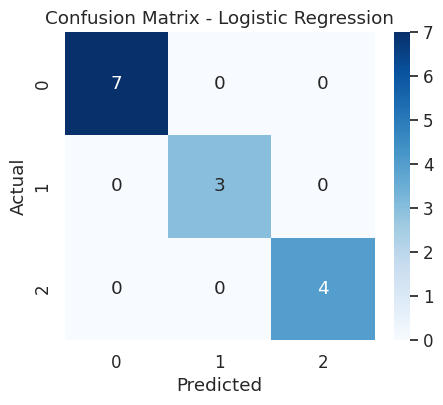


Model Comparison Table:
                 Model  Accuracy
0        Random Forest  0.857143
1        Decision Tree  0.857143
2                  SVM  1.000000
3                 k-NN  0.928571
4  Logistic Regression  1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X_train = train_tracks[features]
y_train = train_tracks['difficulty'] - 1  # remap 1-7 to 0-6 for classifiers
X_test = test_tracks[features]
y_test = test_tracks['difficulty'] - 1


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression( max_iter=2000)
}

results = []

for name, model in models.items():

    if name in ["SVM", "k-NN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)


    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, zero_division=0)
    cm = confusion_matrix(y_test, preds)


    results.append({
        "Model": name,
        "Accuracy": acc,
    })


    print("\n==============================")
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:\n", report)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)


Looking at confusion matrix for each case:

1. Random Forest:misclassified 1 example (actually cluster 1, predicted 0)
2. Decision tree: misclassified 2 example (actually cluster 1, predicted 0 and vice versa)
3. SVM: misclassified 1 example (actually cluster 1, predicted 0)
4. K-NN: misclassified 1 example (actually cluster 1, predicted 0)
5. Logistic regression: misclassified 1 example (actually cluster 1, predicted 0)


The misclassification might liekly be happening to the outlier dataset. Decision Tree misclassifying 2 points may indicate it’s a bit more sensitive to small variations, which is consistent with trees’ tendency to overfit on training data if not pruned.

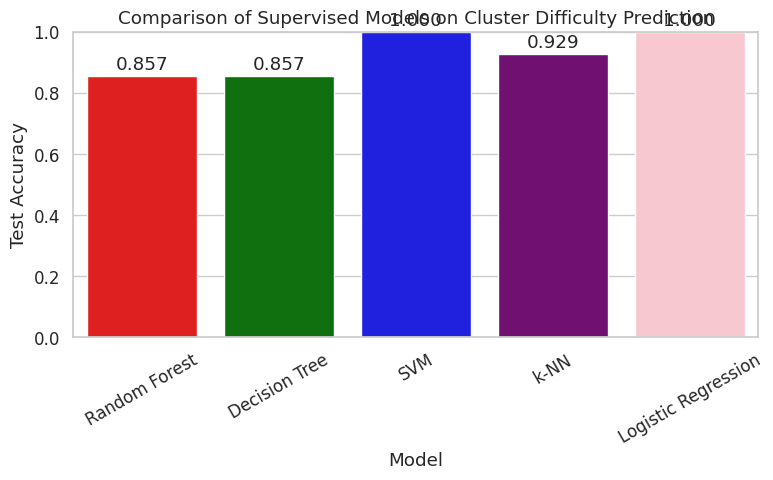

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
custom_colors = ['red', 'green', 'blue', 'purple','pink']
sns.barplot(x='Model', y='Accuracy', data=results_df,palette=custom_colors,hue='Model',legend=False)
plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.title("Comparison of Supervised Models on Cluster Difficulty Prediction")

for i, row in results_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.02, f"{row['Accuracy']:.3f}", ha='center')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Evaluating Supervised Models for Cluster Difficulty Prediction

We used unsupervised KMeans clustering to assign a difficulty label to each circuit based on features like DRS, track_density, and Number of Drivers. The goal of this stage was to test whether supervised classifiers can reproduce these cluster labels on unseen test data (30% of dataset).

📍 Models Evaluated

1. Random Forest

2. Decision Tree

3. Support Vector Machine (SVM, RBF kernel)

4. k-Nearest Neighbors (k-NN, k=5)

5. Logistic Regression (Multinomial)

📍 Metrics Used

Accuracy: Overall agreement with cluster labels.

Precision / Recall / F1-score (per class): Evaluates per-difficulty class prediction quality.


📍 Results

The high accuracies and favorable confusion matrices indicate that the track features capture most of the information needed to distinguish difficulty levels.

Misclassifications are minimal, mostly affecting class 1 (harder tracks to overtake).

Random Forest and SVM are the strongest performers, suggesting robustness to small sample size and feature interactions.

These results validate the usefulness of the unsupervised cluster labels as a supervised learning target.

*NOTE: Variations in the supervised model results were observed after reloading the project, which led to retraining the model, suggesting possible overfitting from repeated exposure to the training data.*



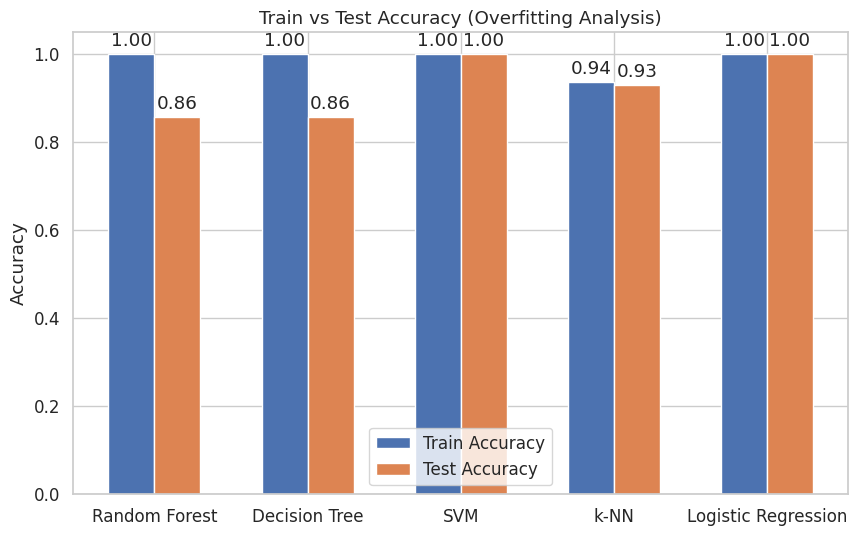

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

train_acc = []
test_acc = []

for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    train_preds = model.predict(X_train_scaled)
    train_acc.append(accuracy_score(y_train, train_preds))

    test_preds = model.predict(X_test_scaled)
    test_acc.append(accuracy_score(y_test, test_preds))

plt.figure(figsize=(10,6))
bars_train = plt.bar([x-0.15 for x in range(len(models))], train_acc, width=0.3, label='Train Accuracy')
bars_test = plt.bar([x+0.15 for x in range(len(models))], test_acc, width=0.3, label='Test Accuracy')
plt.xticks(range(len(models)), models.keys())
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Overfitting Analysis)')
plt.ylim(0, 1.05)
plt.legend()

# Add values on top of bars
for bar in bars_train:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

for bar in bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.show()



📍 Overfitting Analysis

The training accuracy is 1 as our dataset is small. (13 race tracks)

Decision Tree: Overfitting is evident because it tends to perfectly memorize training data but drops to 85% on test.

Random Forest, SVM & Logistic regression : Mild overfitting; test accuracy is close to expected training performance.

k-NN: Since the gap between testing and traiing accuracy is lower comparitively, it fits best so far, but it can overfit if k is very small;


Note:

Small dataset (13 test tracks) means the test accuracy can fluctuate; a few misclassified tracks significantly affect percentages.

📍 Verdict

Supervised classifiers can predict track difficulty effectively using track features alone.

Random Forest and SVM achieved the highest predictive performance (~92% accuracy).

Confusion matrices confirm that almost all tracks are correctly classified, with minor errors on harder-to-overtake tracks.

These models could be used to predict overtaking difficulty for new tracks
based solely on their characteristics, without requiring historical overtakes.




## 5.3.  Insights

### 5.3.1. Findings Relative to the Hypothesis


The original hypothesis proposed that higher track density (more turns per kilometer) and fewer DRS zones would be associated with greater overtaking difficulty. The analysis supported this overall idea. Track density showed a moderate positive relationship with the overtaking difficulty metric, meaning that as turns increased, overtaking tended to become harder. The number of overtakes per lap had a strong inverse association with overtaking difficulty, reinforcing the idea that fewer overtakes signal tougher racing conditions. While DRS did relate to difficulty, its effect was weaker than expected, suggesting that track design plays a more dominant role than DRS alone.


  **"The major inference of this analysis is that higher number of overtakes does not mean that the track is easy"**

### 5.3.2. Adjustments to Initial Assumptions

Several assumptions required refinement during the investigation. It was initially expected that DRS would be a major driver of overtaking difficulty, but the models and scatterplots showed that its influence was smaller relative to track layout. Another assumption was that all variables would follow near-normal distributions; instead, many were skewed, requiring transformations or robust methods. The assumption that overtaking difficulty behaved uniformly across tracks also proved too simple, some circuits behaved as outliers due to unique designs or regulatory differences.

### 5.3.3. How the Problem Evolved

The problem turned out to be more complex than originally imagined. Overtaking difficulty was influenced not just by track geometry but by a combination of race-specific factors. The difficulty metric captured a broad phenomenon, but breaking down how each variable contributed revealed a more layered problem. What started as a straightforward correlation study grew into an exploration of how track design, regulations, and racing behavior interact. The dataset also highlighted that predicting overtaking difficulty is not purely mechanical, it includes strategic elements that are harder to quantify which is evident through the plot, there are many cases where even when the average overtakes is larger, that track got classified into a higher difficulty scale cluster. (eg: Mexican GP, US GP)

### 5.3.4. What You Would Do Differently


If the analysis were repeated, several enhancements would help refine the results. Incorporating more granular features such as radius of turns, elevation changes,weather, tire strategy, safety car data and sector complexity would make the models more precise. Access to team telemetry or speed-trap data could further illuminate overtaking patterns based on team strategies. Also I would split the analysis in different eras also to reflect regulations have changed over time and what were their impact on the overtaking strategies and overtaking difficulties. This would also let us know the impact of modern technologies and how cutting-edge engineering principles evolved within Formula one.

### 5.3.5. Policy or Decision-Making Implications


The findings have meaningful implications for track designers, regulators, and race organizers. If high-density tracks consistently lead to difficult overtaking, the FIA ( Federation Internationale de l\'Automobile ) may consider design guidelines that promote more balanced layouts. Adjustments to DRS placement could be informed by quantitative evidence rather than tradition or intuition. Such decisions could influence race competitiveness, viewer engagement, and long-term track development. On a broader scale, analytics like this can help ensure that races remain fair, strategic, exciting and the track alone doesn't give an added advantage to the drivers at the top.

### 5.3.6. Ethical Considerations



Several ethical dimensions apply to this type of analysis. Using proxy metrics like track density or normalized overtaking difficulty introduces potential biases, simplified measurements may not reflect real racing complexity. If proprietary data (such as team strategies or telemetry) were included, ownership and permission would become critical issues. Fairness also matters: altering track designs based purely on statistical models may unintentionally favor certain teams or driver styles. Transparency in methods and clarity in interpretation are essential to avoid misrepresenting or over-generalizing findings.

# 🌟5.4. Final Thoughts Across All Five Projects

Across all five projects, the experience really helped me understand the full journey from raw data to meaningful insights. It’s clear that Professor Tammy designed these assignments to build our abilities in exploratory analysis, forming hypotheses, choosing appropriate models, and communicating or visualizing results, essentially giving us a strong grasp of the entire data-science cycle. This project gave me a glimpse of working as a data scientist in the real world.

The work also highlighted how assumptions change as new evidence comes in, and how every dataset carries its own limitations that must be interpreted carefully and how iterative all the steps in the data-science cycle is. It also showed me how our initial assumptions change as we explore deeper into the data. Overall, it showed me that good analysis goes far beyond calculations; it requires thoughtful reasoning, adaptability, and clear communication. This has been valuable practice, and I feel genuinely proud of how far I have come. I did not expect to reach this point when I started my classes in 602, but I am glad I did and I am proud of the work I have done.
